### 주제: CarDekho 사이트에 올라온 중고차 가격 회귀 예측
- CarDekho는 인도의 중고차 관련 웹 사이트

<img src='../../images/cardekho.png' width='700px'>

---

#### Features (총 65개)


#### Targets
- listed_price: 판매 사이트에 제시된 가격

In [1]:
import pandas as pd
import numpy as np

# 데이터 세트 불러오기
c_df = pd.read_csv('../../datasets/cars_data_clean.csv', low_memory=False)
c_df

,usedCarSkuId,loc,myear,body,transmission,fuel,km,ip,images,imgCount,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,7111bf25-97af-47f9-867b-40879190d800,gomti nagar,2016,hatchback,manual,cng,69162.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,c309efc1-efaf-4f82-81ad-dcb38eb36665,borivali west,2015,hatchback,manual,cng,45864.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,7609f710-0c97-4f00-9a47-9b9284b62d3a,jasola,2015,sedan,manual,cng,81506.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,278b76e3-5539-4a5e-ae3e-353a2e3b6d7d,jasola,2013,hatchback,manual,cng,115893.0,0,[{'img': ''}],0,...,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,b1eab99b-a606-48dd-a75b-57feb8a9ad92,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,6,...,NaN,12.0,NaN,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,ee6ce523-2aa6-4852-96a1-86b9bc277377,thathawade,2018,suv,manual,diesel,49882.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,Common Rail Injection,NaN,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5
37809,ba1994ac-53ab-4baf-913e-b72f01a37b5d,kharadi,2011,sedan,manual,diesel,82843.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,27,...,Common Rail Injection,NaN,15.0,NaN,88.80,4000.0,200.0,2375.0,NaN,NaN
37810,8f4448ae-53f5-4a3f-b13d-2401dd60c624,kothrud,2020,hatchback,manual,diesel,58000.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,11,...,NaN,NaN,16.0,NaN,88.77,4000.0,200.0,2125.0,NaN,NaN
37811,dbf9b629-7215-494b-a62d-ba1408531362,kothrud,2014,hatchback,manual,diesel,62000.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,8,...,Common Rail Injection,NaN,NaN,NaN,69.00,4000.0,140.0,2400.0,NaN,NaN


In [2]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37813 entries, 0 to 37812
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   usedCarSkuId              37813 non-null  object 
 1   loc                       31963 non-null  object 
 2   myear                     37813 non-null  int64  
 3   body                      37794 non-null  object 
 4   transmission              37813 non-null  object 
 5   fuel                      37813 non-null  object 
 6   km                        37813 non-null  float64
 7   ip                        37813 non-null  int64  
 8   images                    37813 non-null  object 
 9   imgCount                  37813 non-null  int64  
 10  threesixty                37813 non-null  bool   
 11  dvn                       37813 non-null  object 
 12  oem                       37813 non-null  object 
 13  model                     37813 non-null  object 
 14  varian

#### 현재 데이터 세트에 필요한 것들
- 불필요한 컬럼 제거
- 결측치 조정: 데이터가 고작 513개인 컬럼이 있기 때문에 제거는 생각해볼 것. 참고로 중복 데이터는 없음
- 차원 축소: **프로젝트의 목적**. 자세한 방식은 로지스틱 회귀 프로젝트 참고할 것
- 인코딩: 문자열 컬럼은 unique()로 클래스 종류 확인해서 인코딩 방식 정할 것
- 표준화 후 이상치 제거: 꿀 가격 예측 프로젝트 참고. 원래 수치형인 컬럼들만 따로 뺄 것

### 데이터 전처리

In [3]:
# 데이터 세트 복사
pre_c_df = c_df.copy()
pre_c_df

,usedCarSkuId,loc,myear,body,transmission,fuel,km,ip,images,imgCount,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,7111bf25-97af-47f9-867b-40879190d800,gomti nagar,2016,hatchback,manual,cng,69162.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,c309efc1-efaf-4f82-81ad-dcb38eb36665,borivali west,2015,hatchback,manual,cng,45864.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,7609f710-0c97-4f00-9a47-9b9284b62d3a,jasola,2015,sedan,manual,cng,81506.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,278b76e3-5539-4a5e-ae3e-353a2e3b6d7d,jasola,2013,hatchback,manual,cng,115893.0,0,[{'img': ''}],0,...,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,b1eab99b-a606-48dd-a75b-57feb8a9ad92,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,6,...,NaN,12.0,NaN,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,ee6ce523-2aa6-4852-96a1-86b9bc277377,thathawade,2018,suv,manual,diesel,49882.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,Common Rail Injection,NaN,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5
37809,ba1994ac-53ab-4baf-913e-b72f01a37b5d,kharadi,2011,sedan,manual,diesel,82843.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,27,...,Common Rail Injection,NaN,15.0,NaN,88.80,4000.0,200.0,2375.0,NaN,NaN
37810,8f4448ae-53f5-4a3f-b13d-2401dd60c624,kothrud,2020,hatchback,manual,diesel,58000.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,11,...,NaN,NaN,16.0,NaN,88.77,4000.0,200.0,2125.0,NaN,NaN
37811,dbf9b629-7215-494b-a62d-ba1408531362,kothrud,2014,hatchback,manual,diesel,62000.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,8,...,Common Rail Injection,NaN,NaN,NaN,69.00,4000.0,140.0,2400.0,NaN,NaN


In [4]:
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37813 entries, 0 to 37812
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   usedCarSkuId              37813 non-null  object 
 1   loc                       31963 non-null  object 
 2   myear                     37813 non-null  int64  
 3   body                      37794 non-null  object 
 4   transmission              37813 non-null  object 
 5   fuel                      37813 non-null  object 
 6   km                        37813 non-null  float64
 7   ip                        37813 non-null  int64  
 8   images                    37813 non-null  object 
 9   imgCount                  37813 non-null  int64  
 10  threesixty                37813 non-null  bool   
 11  dvn                       37813 non-null  object 
 12  oem                       37813 non-null  object 
 13  model                     37813 non-null  object 
 14  varian

In [5]:
pre_c_df[['Ground Clearance Unladen']]

,Ground Clearance Unladen
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
37808,209.0
37809,NaN
37810,NaN
37811,NaN


In [6]:
pre_c_df['model_type_new'].unique()

array(['used'], dtype=object)

In [7]:
# 불필요한 컬럼들 삭제
columns = ['usedCarSkuId', 'loc', 'images', 'imgCount', 'threesixty', 'dvn', 'City',
           'top_features', 'comfort_features', 'interior_features', 'exterior_features',
           'safety_features', 'Color', 'Valve Configuration', 'model_type_new', 'state', 'exterior_color']

pre_c_df = pre_c_df.drop(labels=columns, axis=1)
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,listed_price,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,2016,hatchback,manual,cng,69162.0,0,maruti,maruti wagon r,lxi cng,370000.0,...,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,2015,hatchback,manual,cng,45864.0,0,maruti,maruti celerio,green vxi,365000.0,...,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,2015,sedan,manual,cng,81506.0,0,honda,honda amaze,s plus i-vtec,421000.0,...,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,2013,hatchback,manual,cng,115893.0,0,maruti,maruti wagon r,lxi cng,240000.0,...,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,2022,muv,manual,cng,18900.0,0,maruti,maruti ertiga,vxi cng,1175000.0,...,NaN,12.0,NaN,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,2018,suv,manual,diesel,49882.0,0,tata,tata nexon,1.5 revotorq xz plus,881000.0,...,Common Rail Injection,NaN,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5
37809,2011,sedan,manual,diesel,82843.0,0,tata,tata manza,aura quadrajet bs iv,245000.0,...,Common Rail Injection,NaN,15.0,NaN,88.80,4000.0,200.0,2375.0,NaN,NaN
37810,2020,hatchback,manual,diesel,58000.0,0,tata,tata altroz,xz diesel,735000.0,...,NaN,NaN,16.0,NaN,88.77,4000.0,200.0,2125.0,NaN,NaN
37811,2014,hatchback,manual,diesel,62000.0,0,tata,tata indica ev2,ls,225000.0,...,Common Rail Injection,NaN,NaN,NaN,69.00,4000.0,140.0,2400.0,NaN,NaN


In [8]:
# 타겟 데이터를 맨 끝으로 이동
pre_c_df.loc[:, 'target'] = pre_c_df.listed_price
pre_c_df = pre_c_df.drop(labels=['listed_price'], axis=1)
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,discountValue,...,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke,target
0,2016,hatchback,manual,cng,69162.0,0,maruti,maruti wagon r,lxi cng,0,...,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN,370000.0
1,2015,hatchback,manual,cng,45864.0,0,maruti,maruti celerio,green vxi,0,...,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN,365000.0
2,2015,sedan,manual,cng,81506.0,0,honda,honda amaze,s plus i-vtec,0,...,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN,421000.0
3,2013,hatchback,manual,cng,115893.0,0,maruti,maruti wagon r,lxi cng,0,...,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN,240000.0
4,2022,muv,manual,cng,18900.0,0,maruti,maruti ertiga,vxi cng,0,...,12.0,NaN,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN,1175000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37808,2018,suv,manual,diesel,49882.0,0,tata,tata nexon,1.5 revotorq xz plus,0,...,NaN,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5,881000.0
37809,2011,sedan,manual,diesel,82843.0,0,tata,tata manza,aura quadrajet bs iv,0,...,NaN,15.0,NaN,88.80,4000.0,200.0,2375.0,NaN,NaN,245000.0
37810,2020,hatchback,manual,diesel,58000.0,0,tata,tata altroz,xz diesel,0,...,NaN,16.0,NaN,88.77,4000.0,200.0,2125.0,NaN,NaN,735000.0
37811,2014,hatchback,manual,diesel,62000.0,0,tata,tata indica ev2,ls,0,...,NaN,NaN,NaN,69.00,4000.0,140.0,2400.0,NaN,NaN,225000.0


#### 중간 분석
- 현재 타겟은 연속형
- 따라서 차원 축소 방식은 무조건 PCA
> - LDA는 클래스 별로 나누는 것이 중점이라, 타겟 데이터가 연속형인 이번 프로젝트에서는 사용 불가

#### 결측치 조정
- 결측치 비율이 10%(3700개) 미만인 컬럼들은 결측치 삭제
- 10% 이상이면 대체(평균 or 중간값 or 최빈값)

- 현재 10% 이상의 결측치가 발견된 컬럼은 Drive Type과 Fuel Suppy System을 제외하고 모두 수치형

- 순서
> 1. 결측치 10% 미만 컬럼 결측치 삭제
> 2. Drive Type, Fuel Suppy System 결측치 조정
> 3. 결측치 10% 이상 컬럼 결측치 조정
> 4. 레이블 인코딩

In [9]:
# 결측치 확인
pre_c_df.isna().sum()

myear                           0
body                           19
transmission                    0
fuel                            0
km                              0
ip                              0
oem                             0
model                           0
variant                         0
discountValue                   0
utype                           0
carType                         0
Engine Type                   868
No of Cylinder                143
Valves per Cylinder           228
Turbo Charger                   0
Super Charger                   0
Length                        362
Width                         371
Height                        363
Wheel Base                    556
Front Tread                 15874
Rear Tread                  15875
Kerb Weight                 13139
Gross Weight                20890
Gear Box                      471
Drive Type                   4497
Seats                          18
Steering Type                 808
Turning Radius

In [10]:
# 결측치 10% 미만인 컬럼들 (+ Drive Type, Fuel Suppy System)
columns = ['body', 'Engine Type', 'No of Cylinder', 'Valves per Cylinder', 'Length', 'Width',
           'Height', 'Wheel Base', 'Gear Box', 'Drive Type', 'Seats', 'Steering Type',
           'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'Doors', 'Fuel Suppy System',
           'Max Power Delivered', 'Max Power At', 'Max Torque Delivered', 'Max Torque At']

# 반복문으로 위 컬럼들의 결측치 제거
for column in columns:
    pre_c_df = pre_c_df[~pre_c_df[column].isna()]

# 결측치 제거 후 데이터 세트 확인
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,discountValue,...,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke,target
1,2015,hatchback,manual,cng,45864.0,0,maruti,maruti celerio,green vxi,0,...,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN,365000.0
3,2013,hatchback,manual,cng,115893.0,0,maruti,maruti wagon r,lxi cng,0,...,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN,240000.0
7,2017,hatchback,manual,cng,58000.0,0,hyundai,hyundai grand i10,1.2 kappa magna cng bsiv,0,...,NaN,NaN,NaN,65.39,6000.0,98.0,4000.0,NaN,NaN,465000.0
8,2021,hatchback,manual,cng,54097.0,0,maruti,maruti wagon r,cng lxi,0,...,NaN,NaN,NaN,58.33,5500.0,78.0,3500.0,73.0,NaN,560000.0
10,2018,hatchback,manual,cng,98083.0,0,maruti,maruti celerio,vxi cng optional bsiv,0,...,11.0,NaN,NaN,58.33,6000.0,78.0,3500.0,73.0,NaN,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37806,2018,suv,manual,diesel,66000.0,0,tata,tata nexon,1.5 revotorq xm,0,...,NaN,NaN,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5,760000.0
37808,2018,suv,manual,diesel,49882.0,0,tata,tata nexon,1.5 revotorq xz plus,0,...,NaN,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5,881000.0
37809,2011,sedan,manual,diesel,82843.0,0,tata,tata manza,aura quadrajet bs iv,0,...,NaN,15.0,NaN,88.80,4000.0,200.0,2375.0,NaN,NaN,245000.0
37811,2014,hatchback,manual,diesel,62000.0,0,tata,tata indica ev2,ls,0,...,NaN,NaN,NaN,69.00,4000.0,140.0,2400.0,NaN,NaN,225000.0


In [11]:
# 현재 결측치 수 확인
pre_c_df.isna().sum()

myear                           0
body                            0
transmission                    0
fuel                            0
km                              0
ip                              0
oem                             0
model                           0
variant                         0
discountValue                   0
utype                           0
carType                         0
Engine Type                     0
No of Cylinder                  0
Valves per Cylinder             0
Turbo Charger                   0
Super Charger                   0
Length                          0
Width                           0
Height                          0
Wheel Base                      0
Front Tread                 10782
Rear Tread                  10768
Kerb Weight                  9540
Gross Weight                15231
Gear Box                        0
Drive Type                      0
Seats                           0
Steering Type                   0
Turning Radius

#### 중간 분석
- Drive Type, Fuel Suppy System 결측치
> - 일단 제거해보고, 만약 결과 이상하면 다음 사이클에서는 결측치 대체

In [12]:
# 결측치 10% 이상인 컬럼들
columns = ['Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight', 'Turning Radius',
           'Top Speed', 'Acceleration', 'Cargo Volume', 'Compression Ratio',
           'Alloy Wheel Size', 'Ground Clearance Unladen', 'Bore', 'Stroke']

# 결측치 10% 이상인 컬럼들의 수치 데이터 출력
pre_c_df[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Front Tread,17995.0,1475.658294,84.654403,1205.00,1450.00,1485.0,1530.0,1690.00
Rear Tread,18009.0,1475.443445,97.040189,15.00,1450.00,1493.0,1525.0,1713.00
Kerb Weight,19237.0,1150.110360,313.456886,600.00,935.00,1066.0,1235.0,2750.00
Gross Weight,13546.0,1733.463605,440.505645,1000.00,1360.00,1640.0,2017.0,3350.00
Turning Radius,25798.0,5.117159,0.504058,4.00,4.80,5.2,5.3,12.84
Top Speed,19354.0,173.589852,25.371234,80.00,156.00,170.0,190.0,325.00
Acceleration,20377.0,13.002799,3.185629,3.20,10.86,13.0,14.5,44.04
Cargo Volume,25105.0,366.299661,128.987715,48.00,259.00,350.0,465.0,2055.00
Compression Ratio,8616.0,13.016141,5.330285,4.17,10.30,10.8,16.5,81.00
Alloy Wheel Size,17748.0,15.460503,1.493007,12.00,14.00,16.0,16.0,21.00


#### 중간 분석
- 현재 위의 모든 컬럼들의 평균값과 중앙값이 비슷한 수치를 보임
- 따라서 이번 프로젝트에서는 중앙값으로 결측치 대체

In [13]:
# 반복문으로 결측치를 중앙값으로 대체
for column in columns:
    pre_c_df[columns] = pre_c_df[columns].fillna(pre_c_df[columns].median())

# 결측치 조정 후의 데이터 세트 확인
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,discountValue,...,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke,target
1,2015,hatchback,manual,cng,45864.0,0,maruti,maruti celerio,green vxi,0,...,11.0,16.0,190.0,58.20,6000.0,78.0,3500.0,73.0,82.5,365000.0
3,2013,hatchback,manual,cng,115893.0,0,maruti,maruti wagon r,lxi cng,0,...,10.8,13.0,190.0,58.20,6200.0,77.0,3500.0,73.0,82.5,240000.0
7,2017,hatchback,manual,cng,58000.0,0,hyundai,hyundai grand i10,1.2 kappa magna cng bsiv,0,...,10.8,16.0,190.0,65.39,6000.0,98.0,4000.0,73.0,82.5,465000.0
8,2021,hatchback,manual,cng,54097.0,0,maruti,maruti wagon r,cng lxi,0,...,10.8,16.0,190.0,58.33,5500.0,78.0,3500.0,73.0,82.5,560000.0
10,2018,hatchback,manual,cng,98083.0,0,maruti,maruti celerio,vxi cng optional bsiv,0,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37806,2018,suv,manual,diesel,66000.0,0,tata,tata nexon,1.5 revotorq xm,0,...,10.8,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5,760000.0
37808,2018,suv,manual,diesel,49882.0,0,tata,tata nexon,1.5 revotorq xz plus,0,...,10.8,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5,881000.0
37809,2011,sedan,manual,diesel,82843.0,0,tata,tata manza,aura quadrajet bs iv,0,...,10.8,15.0,190.0,88.80,4000.0,200.0,2375.0,73.0,82.5,245000.0
37811,2014,hatchback,manual,diesel,62000.0,0,tata,tata indica ev2,ls,0,...,10.8,16.0,190.0,69.00,4000.0,140.0,2400.0,73.0,82.5,225000.0


In [14]:
# 결측치 10% 이상인 컬럼들의 수치 데이터 출력
pre_c_df[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Front Tread,28777.0,1479.158390,67.094472,1205.00,1479.00,1485.0,1501.0,1690.00
Rear Tread,28777.0,1482.012892,77.234755,15.00,1485.00,1493.0,1503.0,1713.00
Kerb Weight,28777.0,1122.226535,259.323925,600.00,1025.00,1066.0,1139.0,2750.00
Gross Weight,28777.0,1683.995483,305.801338,1000.00,1640.00,1640.0,1640.0,3350.00
Turning Radius,28777.0,5.125735,0.477921,4.00,4.80,5.2,5.3,12.84
Top Speed,28777.0,172.414358,20.874664,80.00,164.00,170.0,177.0,325.00
Acceleration,28777.0,13.001982,2.680646,3.20,12.36,13.0,14.0,44.04
Cargo Volume,28777.0,364.219794,120.599811,48.00,280.00,350.0,460.0,2055.00
Compression Ratio,28777.0,11.463525,3.088081,4.17,10.80,10.8,10.8,81.00
Alloy Wheel Size,28777.0,15.667269,1.201471,12.00,15.00,16.0,16.0,21.00


In [15]:
# 결측치 확인
pre_c_df.isna().sum().sum()

0

In [16]:
# 중복 확인
pre_c_df.duplicated().sum()

102

In [17]:
# 중복 데이터 삭제
pre_c_df = pre_c_df.drop_duplicates()
pre_c_df.duplicated().sum()

0

#### 레이블 인코딩

In [18]:
# 데이터 세트 내 컬럼들 중 문자열 데이터가 담긴 컬럼들만 가져오기
columns = pre_c_df.columns
object_columns = []

for column in columns:
    if pre_c_df[column].dtype == 'O':
        object_columns.append(column)

object_columns

['body',
 'transmission',
 'fuel',
 'oem',
 'model',
 'variant',
 'utype',
 'carType',
 'Engine Type',
 'Gear Box',
 'Drive Type',
 'Steering Type',
 'Front Brake Type',
 'Rear Brake Type',
 'Tyre Type',
 'owner_type',
 'Fuel Suppy System']

In [19]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

# 문자열 컬럼들에 레이블 인코더 적용
for column in object_columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_c_df[column])
    pre_c_df.loc[:, column] = result
    encoders[column] = encoder.classes_

print(encoders)

{'body': array(['convertibles', 'coupe', 'hatchback', 'hybrids', 'luxury vehicles',
       'minivans', 'muv', 'pickup trucks', 'sedan', 'suv', 'wagon'],
      dtype=object), 'transmission': array(['automatic', 'manual'], dtype=object), 'fuel': array(['cng', 'diesel', 'electric', 'lpg', 'petrol'], dtype=object), 'oem': array(['ashok leyland', 'aston martin', 'audi', 'bentley', 'bmw',
       'chevrolet', 'datsun', 'dc', 'fiat', 'force', 'ford', 'honda',
       'hyundai', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini',
       'land rover', 'lexus', 'mahindra', 'mahindra ssangyong', 'maruti',
       'maserati', 'mercedes-benz', 'mini', 'mitsubishi', 'nissan',
       'porsche', 'premier', 'renault', 'rolls-royce', 'skoda', 'tata',
       'toyota', 'volkswagen', 'volvo'], dtype=object), 'model': array(['ashok leyland stile', 'aston martin vantage', 'audi a3',
       'audi a3 cabriolet', 'audi a4', 'audi a5', 'audi a6', 'audi a7',
       'audi a8', 'audi a8 2010-2013', 'audi q3', 'audi q5', 

In [20]:
# 현재 데이터 세트 확인
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,discountValue,...,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke,target
1,2015,2,1,0,45864.0,0,22,150,1381,0,...,11.0,16.0,190.0,58.20,6000.0,78.0,3500.0,73.0,82.5,365000.0
3,2013,2,1,0,115893.0,0,22,167,1546,0,...,10.8,13.0,190.0,58.20,6200.0,77.0,3500.0,73.0,82.5,240000.0
7,2017,2,1,0,58000.0,0,12,85,111,0,...,10.8,16.0,190.0,65.39,6000.0,98.0,4000.0,73.0,82.5,465000.0
8,2021,2,1,0,54097.0,0,22,167,1114,0,...,10.8,16.0,190.0,58.33,5500.0,78.0,3500.0,73.0,82.5,560000.0
10,2018,2,1,0,98083.0,0,22,150,2144,0,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37806,2018,9,1,1,66000.0,0,33,241,349,0,...,10.8,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5,760000.0
37808,2018,9,1,1,49882.0,0,33,241,354,0,...,10.8,16.0,209.0,108.50,3750.0,260.0,2125.0,76.0,82.5,881000.0
37809,2011,8,1,1,82843.0,0,33,238,1042,0,...,10.8,15.0,190.0,88.80,4000.0,200.0,2375.0,73.0,82.5,245000.0
37811,2014,2,1,1,62000.0,0,33,236,1503,0,...,10.8,16.0,190.0,69.00,4000.0,140.0,2400.0,73.0,82.5,225000.0


In [21]:
# 현재 데이터 세트의 정보 출력
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28675 entries, 1 to 37812
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   myear                     28675 non-null  int64  
 1   body                      28675 non-null  object 
 2   transmission              28675 non-null  object 
 3   fuel                      28675 non-null  object 
 4   km                        28675 non-null  float64
 5   ip                        28675 non-null  int64  
 6   oem                       28675 non-null  object 
 7   model                     28675 non-null  object 
 8   variant                   28675 non-null  object 
 9   discountValue             28675 non-null  int64  
 10  utype                     28675 non-null  object 
 11  carType                   28675 non-null  object 
 12  Engine Type               28675 non-null  object 
 13  No of Cylinder            28675 non-null  float64
 14  Valves per 

In [22]:
# 레이블 인코딩 한 컬럼들의 데이터 타입을 int로 변경
for column in object_columns:
    pre_c_df[column] = pre_c_df[column].astype(np.int64)

C:\Users\User\AppData\Local\Temp\ipykernel_3252\2630121914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_c_df[column] = pre_c_df[column].astype(np.int64)
C:\Users\User\AppData\Local\Temp\ipykernel_3252\2630121914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_c_df[column] = pre_c_df[column].astype(np.int64)
C:\Users\User\AppData\Local\Temp\ipykernel_3252\2630121914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [23]:
# 현재 데이터 세트의 정보 출력
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28675 entries, 1 to 37812
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   myear                     28675 non-null  int64  
 1   body                      28675 non-null  int64  
 2   transmission              28675 non-null  int64  
 3   fuel                      28675 non-null  int64  
 4   km                        28675 non-null  float64
 5   ip                        28675 non-null  int64  
 6   oem                       28675 non-null  int64  
 7   model                     28675 non-null  int64  
 8   variant                   28675 non-null  int64  
 9   discountValue             28675 non-null  int64  
 10  utype                     28675 non-null  int64  
 11  carType                   28675 non-null  int64  
 12  Engine Type               28675 non-null  int64  
 13  No of Cylinder            28675 non-null  float64
 14  Valves per 

In [24]:
# 일부 float타입 컬럼들과 bool타입 컬럼의 데이터 타입을 int타입으로 변경
# StandardScaler를 통한 이상치 제거 과정의 편의를 위한 전처리
columns = ['km', 'Turbo Charger', 'Super Charger', 'No of Cylinder', 'Valves per Cylinder', 'Seats', 'Doors', 'target']

for column in columns:
    pre_c_df[column] = pre_c_df[column].astype(np.int64)

C:\Users\User\AppData\Local\Temp\ipykernel_3252\2048862895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_c_df[column] = pre_c_df[column].astype(np.int64)
C:\Users\User\AppData\Local\Temp\ipykernel_3252\2048862895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_c_df[column] = pre_c_df[column].astype(np.int64)
C:\Users\User\AppData\Local\Temp\ipykernel_3252\2048862895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [25]:
# 현재 데이터 세트의 정보 출력
pre_c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28675 entries, 1 to 37812
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   myear                     28675 non-null  int64  
 1   body                      28675 non-null  int64  
 2   transmission              28675 non-null  int64  
 3   fuel                      28675 non-null  int64  
 4   km                        28675 non-null  int64  
 5   ip                        28675 non-null  int64  
 6   oem                       28675 non-null  int64  
 7   model                     28675 non-null  int64  
 8   variant                   28675 non-null  int64  
 9   discountValue             28675 non-null  int64  
 10  utype                     28675 non-null  int64  
 11  carType                   28675 non-null  int64  
 12  Engine Type               28675 non-null  int64  
 13  No of Cylinder            28675 non-null  int64  
 14  Valves per 

#### 이후 과정
- StandardScaler로 이상치 제거
- discountValue의 이상치(1) 제거

In [26]:
# 데이터 세트 내 컬럼들 중 문자열 데이터가 담긴 컬럼들만 가져오기
columns = pre_c_df.columns
float_columns = []

for column in columns:
    if pre_c_df[column].dtype == 'float64':
        float_columns.append(column)

float_columns

['Length',
 'Width',
 'Height',
 'Wheel Base',
 'Front Tread',
 'Rear Tread',
 'Kerb Weight',
 'Gross Weight',
 'Turning Radius',
 'Top Speed',
 'Acceleration',
 'Cargo Volume',
 'Compression Ratio',
 'Alloy Wheel Size',
 'Ground Clearance Unladen',
 'Max Power Delivered',
 'Max Power At',
 'Max Torque Delivered',
 'Max Torque At',
 'Bore',
 'Stroke']

In [27]:
from sklearn.preprocessing import StandardScaler
# float형 컬럼들만 StandardScaler 적용한 새로운 데이터 세트 생성

std = StandardScaler()
result = std.fit_transform(pre_c_df.loc[:, float_columns])
std_pre_c_df = pd.DataFrame(result, columns=pre_c_df.loc[:, float_columns].columns)
std_pre_c_df

,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Turning Radius,Top Speed,...,Cargo Volume,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,-1.296759,-1.000288,-0.118733,-0.797016,-0.881680,-0.932005,-0.799343,-1.092352,-0.889938,-1.074380,...,-1.071388,-0.150018,0.278625,0.091954,-1.066772,0.899596,-1.053832,0.354167,0.028037,-0.026909
1,-1.309335,-1.977734,1.114623,-0.959576,-2.746442,-2.486378,-0.625416,-1.092352,-1.099082,-0.114470,...,-0.117184,-0.214715,-2.221503,0.091954,-1.066772,1.087416,-1.063573,0.354167,0.028037,-0.026909
2,-0.881774,-0.531115,-0.471120,-0.797016,-0.001512,0.143102,-0.215720,-0.143054,-0.680795,-0.354447,...,-0.897142,-0.214715,0.278625,0.091954,-0.892598,0.899596,-0.859007,0.837608,0.028037,-0.026909
3,-1.158431,-0.843897,0.894381,-0.731992,0.087997,0.143102,-0.837994,-1.125087,-0.889938,-0.114470,...,-0.191861,-0.214715,0.278625,0.091954,-1.063622,0.430047,-1.053832,0.354167,0.028037,-0.026909
4,-1.057828,-1.000288,-0.118733,-0.797016,-0.881680,-0.932005,-0.760693,-1.092352,-0.889938,-1.074380,...,-1.071388,-0.150018,0.278625,0.091954,-1.063622,0.899596,-1.053832,0.354167,0.028037,-0.026909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28670,-0.305825,0.649640,0.295322,-0.322341,0.908492,0.622367,0.708027,-0.143054,-0.053364,-0.873279,...,-0.117184,-0.214715,0.278625,2.676641,0.151720,-1.213378,0.719076,-0.975297,0.436483,-0.026909
28671,-0.305825,0.649640,0.295322,-0.322341,0.908492,0.622367,0.708027,-0.143054,-0.053364,-0.873279,...,-0.117184,-0.214715,0.278625,2.676641,0.151720,-1.213378,0.719076,-0.975297,0.436483,-0.026909
28672,0.747985,-0.194873,-0.206830,-0.179288,0.087997,0.143102,0.302196,-0.110320,-0.053364,-0.114470,...,0.795532,-0.214715,-0.554751,0.091954,-0.325502,-0.978603,0.134601,-0.733577,0.028037,-0.026909
28673,-1.070404,-0.492017,-0.779459,-0.959576,0.087997,0.143102,-0.161610,-0.143054,-0.471651,-0.834403,...,-1.195849,-0.214715,0.278625,0.091954,-0.805147,-0.978603,-0.449874,-0.709405,0.028037,-0.026909


In [28]:
condition = True

# 반복문으로 각 컬럼에서 -1.96 ~ 1.96 사이의 데이터만 가져오는 조건식 생성
for column in std_pre_c_df.columns:
    condition &= std_pre_c_df[column].between(-1.96, 1.96)

# 위 조건에 맞지 않는 데이터 삭제
std_pre_c_df = std_pre_c_df[condition]
std_pre_c_df

,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Turning Radius,Top Speed,...,Cargo Volume,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,-1.296759,-1.000288,-0.118733,-0.797016,-0.881680,-0.932005,-0.799343,-1.092352,-0.889938,-1.074380,...,-1.071388,-0.150018,0.278625,0.091954,-1.066772,0.899596,-1.053832,0.354167,0.028037,-0.026909
2,-0.881774,-0.531115,-0.471120,-0.797016,-0.001512,0.143102,-0.215720,-0.143054,-0.680795,-0.354447,...,-0.897142,-0.214715,0.278625,0.091954,-0.892598,0.899596,-0.859007,0.837608,0.028037,-0.026909
4,-1.057828,-1.000288,-0.118733,-0.797016,-0.881680,-0.932005,-0.760693,-1.092352,-0.889938,-1.074380,...,-1.071388,-0.150018,0.278625,0.091954,-1.063622,0.899596,-1.053832,0.354167,0.028037,-0.026909
5,-1.057828,-1.000288,-0.118733,-0.797016,-0.881680,-0.932005,-0.780018,-1.092352,-0.889938,-1.074380,...,-1.071388,-0.150018,0.278625,0.091954,-1.063622,0.899596,-1.053832,0.354167,0.028037,-0.026909
6,0.453723,-0.257430,0.982477,1.251239,0.013406,0.104243,0.514774,-0.143054,0.155779,-0.402443,...,-1.901130,-0.150018,0.278625,0.091954,-0.527534,0.899596,-0.722629,0.837608,0.028037,-0.026909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28665,-0.929560,-0.632769,-0.338975,-0.959576,-1.180042,-0.802474,-0.316212,-0.143054,-0.471651,-1.074380,...,-1.013306,1.467408,0.278625,0.091954,-0.805147,-0.978603,-0.449874,-0.709405,0.300334,-0.026909
28666,1.213272,1.298663,1.167481,1.257741,0.087997,0.143102,-0.215720,-0.143054,0.155779,-0.114470,...,0.505122,1.629150,1.112001,0.091954,0.868765,-1.213378,1.595788,-0.975297,0.028037,-0.026909
28672,0.747985,-0.194873,-0.206830,-0.179288,0.087997,0.143102,0.302196,-0.110320,-0.053364,-0.114470,...,0.795532,-0.214715,-0.554751,0.091954,-0.325502,-0.978603,0.134601,-0.733577,0.028037,-0.026909
28673,-1.070404,-0.492017,-0.779459,-0.959576,0.087997,0.143102,-0.161610,-0.143054,-0.471651,-0.834403,...,-1.195849,-0.214715,0.278625,0.091954,-0.805147,-0.978603,-0.449874,-0.709405,0.028037,-0.026909


In [29]:
# 이상치가 없는 인덱스만 유지하고 인덱스 초기화
pre_c_df = pre_c_df.iloc[std_pre_c_df.index].reset_index(drop=True)
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,discountValue,...,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke,target
0,2015,2,1,0,45864,0,22,150,1381,0,...,11.0,16.0,190.0,58.20,6000.0,78.0,3500.0,73.0,82.5,365000
1,2017,2,1,0,58000,0,12,85,111,0,...,10.8,16.0,190.0,65.39,6000.0,98.0,4000.0,73.0,82.5,465000
2,2018,2,1,0,98083,0,22,150,2144,0,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,425000
3,2019,2,1,0,80000,0,22,150,2141,0,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,380000
4,2017,6,1,0,39000,0,22,155,2140,0,...,11.0,16.0,190.0,80.46,6000.0,112.0,4000.0,73.0,82.5,795000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17825,2018,2,1,1,63000,0,33,244,58,0,...,16.0,16.0,190.0,69.00,4000.0,140.0,2400.0,75.0,82.5,460000
17826,2019,9,1,1,96029,0,33,233,2281,0,...,16.5,17.0,190.0,138.10,3750.0,350.0,2125.0,73.0,82.5,1293000
17827,2011,8,1,1,82843,0,33,238,1042,0,...,10.8,15.0,190.0,88.80,4000.0,200.0,2375.0,73.0,82.5,245000
17828,2014,2,1,1,62000,0,33,236,1503,0,...,10.8,16.0,190.0,69.00,4000.0,140.0,2400.0,73.0,82.5,225000


In [30]:
# discountValue의 클래스 값들 출력
pre_c_df.discountValue.unique()

array([    0, 24000, 30000,  5000, 65000, 10000,  3000, 36000,  7000,
       57000, 37000, 32000, 21000,  4000, 50000, 14000, 15000],
      dtype=int64)

In [31]:
# target에 discountValue 적용 후, discountValue 제거
pre_c_df.loc[:, 'target'] = pre_c_df.target - pre_c_df.discountValue
pre_c_df = pre_c_df.drop(labels=['discountValue'], axis=1)
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,utype,...,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke,target
0,2015,2,1,0,45864,0,22,150,1381,0,...,11.0,16.0,190.0,58.20,6000.0,78.0,3500.0,73.0,82.5,365000
1,2017,2,1,0,58000,0,12,85,111,0,...,10.8,16.0,190.0,65.39,6000.0,98.0,4000.0,73.0,82.5,465000
2,2018,2,1,0,98083,0,22,150,2144,0,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,425000
3,2019,2,1,0,80000,0,22,150,2141,1,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,380000
4,2017,6,1,0,39000,0,22,155,2140,0,...,11.0,16.0,190.0,80.46,6000.0,112.0,4000.0,73.0,82.5,795000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17825,2018,2,1,1,63000,0,33,244,58,0,...,16.0,16.0,190.0,69.00,4000.0,140.0,2400.0,75.0,82.5,460000
17826,2019,9,1,1,96029,0,33,233,2281,0,...,16.5,17.0,190.0,138.10,3750.0,350.0,2125.0,73.0,82.5,1293000
17827,2011,8,1,1,82843,0,33,238,1042,0,...,10.8,15.0,190.0,88.80,4000.0,200.0,2375.0,73.0,82.5,245000
17828,2014,2,1,1,62000,0,33,236,1503,0,...,10.8,16.0,190.0,69.00,4000.0,140.0,2400.0,73.0,82.5,225000


In [32]:
# 현재 target 값이 0 이하인 데이터가 있는지 확인
# 모델 학습 과정에서 발생할 수 있는 이슈를 사전에 방지하기 위함
pre_c_df[pre_c_df.target <= 0]

,myear,body,transmission,fuel,km,ip,oem,model,variant,utype,...,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke,target


<Axes: >

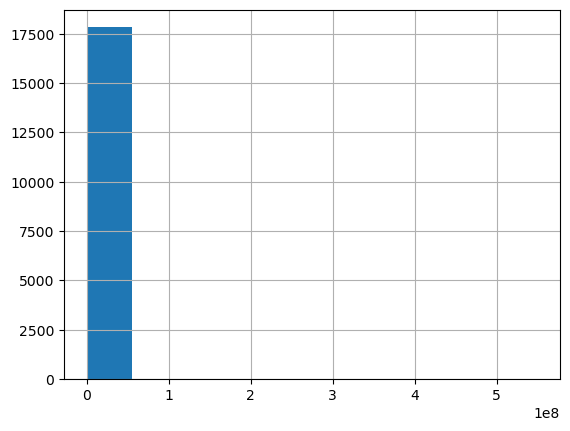

In [33]:
# 현재 target의 데이터 분포 출력
pre_c_df.target.hist()

In [34]:
# 현재 target의 수치 데이터 출력
pre_c_df.target.describe().T

count    1.783000e+04
mean     6.214049e+05
std      4.129387e+06
min      5.000000e+04
25%      3.629362e+05
50%      5.200000e+05
75%      7.250000e+05
max      5.500006e+08
Name: target, dtype: float64

In [35]:
# target 값이 200만 이상인 데이터 삭제 후 인덱스 초기화
pre_c_df = pre_c_df[pre_c_df.target < 2000000].reset_index(drop=True)
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,utype,...,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke,target
0,2015,2,1,0,45864,0,22,150,1381,0,...,11.0,16.0,190.0,58.20,6000.0,78.0,3500.0,73.0,82.5,365000
1,2017,2,1,0,58000,0,12,85,111,0,...,10.8,16.0,190.0,65.39,6000.0,98.0,4000.0,73.0,82.5,465000
2,2018,2,1,0,98083,0,22,150,2144,0,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,425000
3,2019,2,1,0,80000,0,22,150,2141,1,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,380000
4,2017,6,1,0,39000,0,22,155,2140,0,...,11.0,16.0,190.0,80.46,6000.0,112.0,4000.0,73.0,82.5,795000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,2018,2,1,1,63000,0,33,244,58,0,...,16.0,16.0,190.0,69.00,4000.0,140.0,2400.0,75.0,82.5,460000
17755,2019,9,1,1,96029,0,33,233,2281,0,...,16.5,17.0,190.0,138.10,3750.0,350.0,2125.0,73.0,82.5,1293000
17756,2011,8,1,1,82843,0,33,238,1042,0,...,10.8,15.0,190.0,88.80,4000.0,200.0,2375.0,73.0,82.5,245000
17757,2014,2,1,1,62000,0,33,236,1503,0,...,10.8,16.0,190.0,69.00,4000.0,140.0,2400.0,73.0,82.5,225000


In [36]:
# 현재 target의 수치 데이터 출력
pre_c_df.target.describe().T

count    1.775900e+04
mean     5.826898e+05
std      3.203822e+05
min      5.000000e+04
25%      3.603195e+05
50%      5.200000e+05
75%      7.200000e+05
max      1.999000e+06
Name: target, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


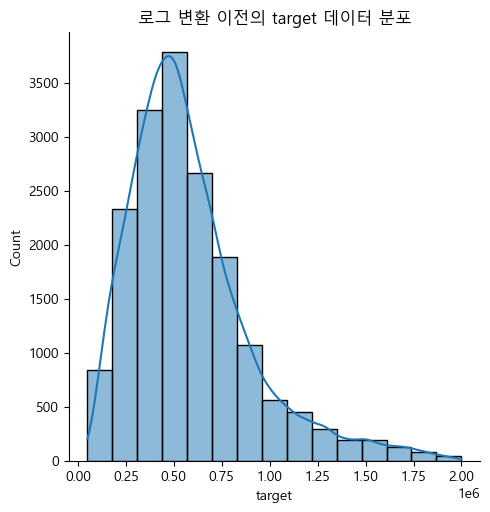

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 현재 target의 데이터 분포를 히스토그램으로 시각화
ax = sns.displot(pre_c_df.target, bins=15, kde=True)
plt.title('로그 변환 이전의 target 데이터 분포')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


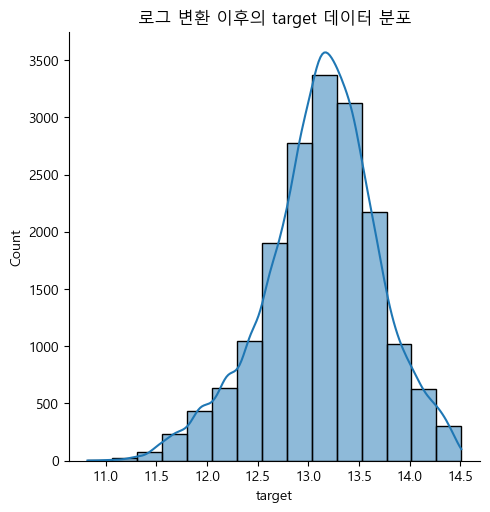

In [38]:
# target에 log를 취했을 때의 데이터 분포 시각화
# 현재 target의 데이터 분포를 히스토그램으로 시각화
sns.displot(np.log1p(pre_c_df.target), bins=15, kde=True)
plt.title('로그 변환 이후의 target 데이터 분포')
plt.show()

In [39]:
# log 변환 전후의 왜도 출력
print(pre_c_df.target.skew())
print(np.log1p(pre_c_df.target).skew())

1.3181226096533245
-0.3504468788591889


In [40]:
# target의 값을 로그를 취한 이후의 수치로 대체
pre_c_df.target = np.log1p(pre_c_df.target)
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,utype,...,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke,target
0,2015,2,1,0,45864,0,22,150,1381,0,...,11.0,16.0,190.0,58.20,6000.0,78.0,3500.0,73.0,82.5,12.807655
1,2017,2,1,0,58000,0,12,85,111,0,...,10.8,16.0,190.0,65.39,6000.0,98.0,4000.0,73.0,82.5,13.049795
2,2018,2,1,0,98083,0,22,150,2144,0,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,12.959847
3,2019,2,1,0,80000,0,22,150,2141,1,...,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,82.5,12.847929
4,2017,6,1,0,39000,0,22,155,2140,0,...,11.0,16.0,190.0,80.46,6000.0,112.0,4000.0,73.0,82.5,13.586099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,2018,2,1,1,63000,0,33,244,58,0,...,16.0,16.0,190.0,69.00,4000.0,140.0,2400.0,75.0,82.5,13.038984
17755,2019,9,1,1,96029,0,33,233,2281,0,...,16.5,17.0,190.0,138.10,3750.0,350.0,2125.0,73.0,82.5,14.072476
17756,2011,8,1,1,82843,0,33,238,1042,0,...,10.8,15.0,190.0,88.80,4000.0,200.0,2375.0,73.0,82.5,12.409018
17757,2014,2,1,1,62000,0,33,236,1503,0,...,10.8,16.0,190.0,69.00,4000.0,140.0,2400.0,73.0,82.5,12.323860


#### 중간 분석
- log를 취한 이후, skew()로 출력한 왜도가 보다 0에 가까워진 것을 확인 
- 히스토그램 시각화 결과 역시, log를 취했을 때 데이터 분포 형태가 표준 정규 분포에 더 가까운 형태를 보임
- 따라서 모델 학습은 로그를 취한 값을 적용 후 진행
- 학습 후 예측하기 전, expm1() 함수를 취해 log 취하기 전 값으로 원복 

In [41]:
# 각 feature 별 target과의 상관관계 출력
pre_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                       0.741956
Width                       0.618547
Max Power Delivered         0.523028
Alloy Wheel Size            0.487393
Wheel Base                  0.483912
body                        0.432280
Turning Radius              0.419528
Length                      0.392115
Gear Box                    0.366724
Height                      0.357097
Max Torque Delivered        0.349992
Cargo Volume                0.333756
Top Speed                   0.277526
Super Charger               0.247421
Turbo Charger               0.247421
Rear Tread                  0.231008
Front Tread                 0.220910
Valves per Cylinder         0.204468
No of Cylinder              0.181408
Kerb Weight                 0.155873
Compression Ratio           0.073072
ip                          0.070492
Steering Type               0.056802
Seats                       0.030047
Ground Clearance Unladen    0.010709
Doors                      -0.004812
Max Power At               -0.019154
G

<Axes: >

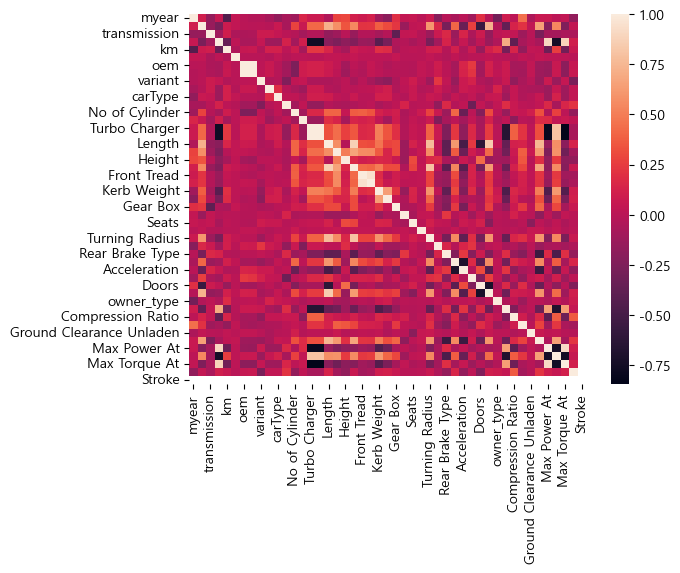

In [42]:
# 각 feature들 간 상관관계 시각화
sns.heatmap(pre_c_df.iloc[:, :-1].corr())

In [43]:
pre_c_df.iloc[:, :-1].corr()

,myear,body,transmission,fuel,km,ip,oem,model,variant,utype,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
myear,1.000000,0.100230,-0.158445,0.051812,-0.440841,0.038945,-0.007308,-0.025123,-0.026120,-0.077420,...,0.090946,0.008726,0.441790,-0.055535,0.068823,0.061749,0.009656,0.028825,-0.167389,NaN
body,0.100230,1.000000,-0.139436,-0.267938,0.082278,0.029660,0.001356,-0.001435,-0.000040,-0.009538,...,-0.363592,0.134805,0.203493,0.029378,0.643167,-0.222558,0.540150,-0.252674,0.041067,NaN
transmission,-0.158445,-0.139436,1.000000,-0.101722,0.106145,-0.051668,-0.052328,-0.046362,0.079096,0.078650,...,0.035653,0.030507,-0.120287,-0.006494,-0.265912,-0.085318,-0.092136,-0.059494,-0.064036,NaN
fuel,0.051812,-0.267938,-0.101722,1.000000,-0.351519,0.014703,-0.068135,-0.069342,0.046539,-0.118273,...,0.695012,-0.386961,-0.074055,-0.009660,-0.076424,0.903683,-0.740695,0.880123,0.105588,NaN
km,-0.440841,0.082278,0.106145,-0.351519,1.000000,-0.041895,0.054742,0.062015,-0.031945,0.114988,...,-0.289907,0.141632,-0.159535,0.033119,0.020882,-0.326992,0.255651,-0.309305,0.062554,NaN
ip,0.038945,0.029660,-0.051668,0.014703,-0.041895,1.000000,-0.002637,-0.004416,-0.005341,-0.024092,...,-0.010558,-0.018256,0.025433,0.005209,0.042178,0.014752,0.014976,0.009124,-0.001116,NaN
oem,-0.007308,0.001356,-0.052328,-0.068135,0.054742,-0.002637,1.000000,0.994267,0.009945,0.060386,...,0.078257,-0.083217,-0.076826,0.033887,-0.115058,-0.137270,0.063447,-0.188714,0.049893,NaN
model,-0.025123,-0.001435,-0.046362,-0.069342,0.062015,-0.004416,0.994267,1.000000,0.014386,0.058983,...,0.078353,-0.078059,-0.091248,0.031933,-0.116832,-0.142156,0.066331,-0.192706,0.063702,NaN
variant,-0.026120,-0.000040,0.079096,0.046539,-0.031945,-0.005341,0.009945,0.014386,1.000000,-0.037028,...,0.063530,-0.172564,-0.070367,-0.002748,-0.134353,0.071691,-0.131032,0.043158,-0.269591,NaN
utype,-0.077420,-0.009538,0.078650,-0.118273,0.114988,-0.024092,0.060386,0.058983,-0.037028,1.000000,...,-0.067191,0.049490,-0.049769,-0.062792,-0.065664,-0.127346,0.053502,-0.109379,0.031649,NaN


In [44]:
# 현재 Stroke의 값 분포 출력
pre_c_df.Stroke.unique()

array([82.5])

In [45]:
# Stroke 컬럼 제거
# 현재 한 가지 값만 가지고 있기 때문에 머신 러닝에 도움이 되지 않음
pre_c_df = pre_c_df.drop(labels=['Stroke'], axis=1)
pre_c_df

,myear,body,transmission,fuel,km,ip,oem,model,variant,utype,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,target
0,2015,2,1,0,45864,0,22,150,1381,0,...,6,11.0,16.0,190.0,58.20,6000.0,78.0,3500.0,73.0,12.807655
1,2017,2,1,0,58000,0,12,85,111,0,...,9,10.8,16.0,190.0,65.39,6000.0,98.0,4000.0,73.0,13.049795
2,2018,2,1,0,98083,0,22,150,2144,0,...,6,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,12.959847
3,2019,2,1,0,80000,0,22,150,2141,1,...,6,11.0,16.0,190.0,58.33,6000.0,78.0,3500.0,73.0,12.847929
4,2017,6,1,0,39000,0,22,155,2140,0,...,9,11.0,16.0,190.0,80.46,6000.0,112.0,4000.0,73.0,13.586099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,2018,2,1,1,63000,0,33,244,58,0,...,0,16.0,16.0,190.0,69.00,4000.0,140.0,2400.0,75.0,13.038984
17755,2019,9,1,1,96029,0,33,233,2281,0,...,0,16.5,17.0,190.0,138.10,3750.0,350.0,2125.0,73.0,14.072476
17756,2011,8,1,1,82843,0,33,238,1042,0,...,0,10.8,15.0,190.0,88.80,4000.0,200.0,2375.0,73.0,12.409018
17757,2014,2,1,1,62000,0,33,236,1503,0,...,0,10.8,16.0,190.0,69.00,4000.0,140.0,2400.0,73.0,12.323860


### 1st Cycle - 차원 축소 없이 선형 회귀
- PCA 차원 축소 후 결과와 비교 분석

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# 선형 회귀 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [48]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.0442, RMSE: 0.2101, MSLE: 0.0002, RMSLE: 0.0152, R2: 0.8537


#### 과적합 발생 여부 확인
- 같은 모델로 train 데이터와 test 데이터를 각각 예측한 다음 평가
- 시각화 결과를 포함하여 과적합 발생 여부 검증

MSE: 0.0452, RMSE: 0.2125, MSLE: 0.0002, RMSLE: 0.0154, R2: 0.8560


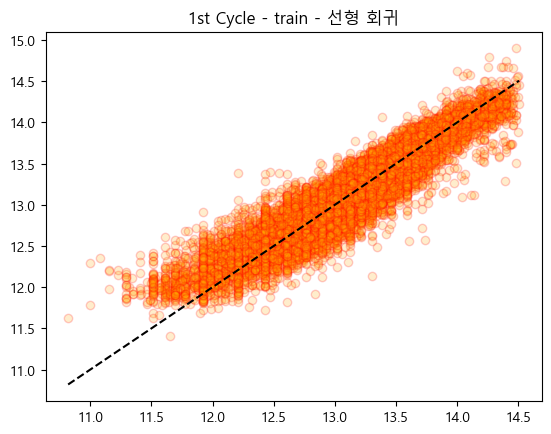

In [49]:
import matplotlib.pyplot as plt

# 모델 훈련 후 train 데이터 예측하고 평가
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('1st Cycle - train - 선형 회귀')
plt.show()

MSE: 0.0442, RMSE: 0.2101, MSLE: 0.0002, RMSLE: 0.0152, R2: 0.8537


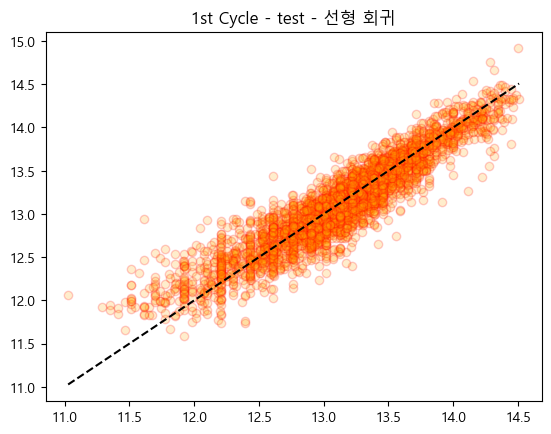

In [50]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('1st Cycle - test - 선형 회귀')
plt.show()

#### 1st Cycle - 차원 축소 없이 선형 회귀한 결과
- train 데이터와 test 데이터의 R2와 오차가 큰 차이를 보이지 않음
- 따라서 현재 모델에는 과적합이 발생하지 않은 것으로 추정

### 1st Cycle - 차원 축소
- 차원 축소 이전에도 만족스러운 결과를 보였지만,  
  학습에 사용된 feature의 개수가 많기 때문에 모델의 계산 효율에 악영향을 줄 수 있음
- 따라서 표현력 손실을 감수하더라도 차원 축소를 통해 계산 효율을 향상
- 현재 target이 연속형이기 때문에 차원 축소는 PCA 방식으로만 진행

In [51]:
from sklearn.decomposition import PCA

# 1 ~ 15차원까지 늘려보면서 각 차원의 데이터 보존률 출력
# fit하기 적합한 차원 수를 알아보기 위함
for i in range(15):
    pca = PCA(n_components=(i + 1))

    pca_train = pca.fit_transform(X_train)
    pca_test = pca.transform(X_test)
    
    # 차원 축소 후 데이터 보존률 확인
    print(f'{i + 1}차원')
    print(pca.explained_variance_ratio_.sum())
    print('=' * 30)

1차원
0.9982300749508576
2차원
0.9994762779157293
3차원
0.99984566711732
4차원
0.9999145672695126
5차원
0.9999685889866416
6차원
0.9999805199241661
7차원
0.9999852108420293
8차원
0.9999895619955199
9차원
0.9999932257703703
10차원
0.9999956029825384
11차원
0.9999972391051548
12차원
0.9999984670150776
13차원
0.9999991030529476
14차원
0.9999996025564408
15차원
0.999999872916776


In [52]:
# 차원 축소 이전, 훈련 데이터와 테스트 데이터를 각각 병합하여 새로운 데이터 세트 생성
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [53]:
# 훈련용, 테스트용 데이터 세트 확인
display(train_df)

,myear,body,transmission,fuel,km,ip,oem,model,variant,utype,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,target
0,2018,9,0,4,41320,0,30,210,1688,0,...,9,10.8,16.0,190.0,104.50,5600.0,142.00,4000.0,73.0,13.790194
1,2022,9,1,1,15000,0,16,108,1429,1,...,0,10.8,17.0,190.0,113.43,4000.0,250.00,2125.0,73.0,14.346139
2,2020,2,0,4,3990,0,30,214,1099,0,...,9,10.8,16.0,190.0,67.00,5500.0,91.00,4250.0,73.0,13.171536
3,2017,2,1,4,86543,0,12,85,103,0,...,9,10.8,14.0,190.0,81.86,6000.0,113.75,4000.0,73.0,13.221305
4,2017,9,0,4,24083,0,30,210,1688,0,...,9,10.8,16.0,190.0,104.50,5600.0,142.00,4000.0,73.0,13.696728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14202,2017,2,1,4,60000,0,30,214,40,1,...,9,10.8,16.0,190.0,67.00,5500.0,91.00,4250.0,73.0,12.429220
14203,2018,2,1,1,70618,0,12,88,276,0,...,0,10.8,16.0,190.0,88.73,4000.0,219.70,2125.0,73.0,13.060490
14204,2017,2,1,4,50000,0,12,88,1578,0,...,9,10.8,16.0,190.0,81.83,6000.0,114.70,4000.0,73.0,13.199326
14205,2018,9,1,1,73893,0,15,105,620,0,...,0,10.8,16.0,190.0,170.00,3750.0,350.00,2125.0,73.0,14.115616


In [54]:
display(test_df)

,myear,body,transmission,fuel,km,ip,oem,model,variant,utype,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,target
0,2017,2,0,4,42961,0,12,85,109,0,...,9,10.8,16.0,190.0,81.86,6000.0,113.75,4000.0,73.0,13.210376
1,2019,8,1,4,53128,0,22,152,1187,0,...,9,10.8,15.0,190.0,103.25,6000.0,138.00,4400.0,74.0,13.458837
2,2011,2,1,4,80000,0,10,65,1670,1,...,4,10.8,14.0,190.0,70.00,6250.0,102.00,4000.0,73.0,12.429220
3,2021,9,1,1,36836,0,12,95,1944,0,...,0,10.8,16.0,190.0,98.60,4000.0,240.26,2125.0,73.0,14.038655
4,2021,6,1,0,60000,0,22,155,1119,1,...,9,10.5,16.0,190.0,91.19,6000.0,122.00,4400.0,74.0,13.764218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,2017,8,1,4,75048,0,11,73,1447,0,...,0,10.3,15.0,190.0,117.30,6600.0,145.00,4600.0,73.0,13.251637
3548,2020,8,0,4,30015,0,11,74,2311,0,...,9,10.8,17.0,190.0,139.46,6500.0,174.00,4300.0,73.0,14.465229
3549,2012,2,1,4,76500,0,11,72,1807,1,...,0,10.8,16.0,190.0,86.80,6000.0,109.00,4500.0,73.0,12.206078
3550,2020,2,0,4,13599,0,22,162,996,0,...,9,10.8,16.0,190.0,81.80,6000.0,113.00,4200.0,73.0,13.384729


#### 1st Cycle - 2차원으로 차원 축소

In [55]:
# 아래 모델의 train, test 데이터 각각의 R2를 담을 빈 리스트 선언
train_r2 = []
test_r2 = []

In [56]:
from sklearn.decomposition import PCA

# 차원 축소 후 목표 차원을 2차원으로 설정
pca = PCA(n_components=2)

pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

# 차원 축소 여부 확인
print(pca_train.shape, pca_test.shape)

(14207, 2) (3552, 2)


In [57]:
# 차원 축소된 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df.target

In [58]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)

,pca1,pca2,target
0,-19831.075573,410.952367,13.790194
1,-46119.652219,-2368.879921,14.346139
2,-57160.073989,87.853604,13.171536
3,25385.436009,1197.258815,13.221305
4,-37066.818102,203.467795,13.696728
...,...,...,...
14202,-1153.563662,722.385293,12.429220
14203,9494.909603,-1744.913202,13.060490
14204,-11155.516971,804.773909,13.199326
14205,12772.101513,-1886.811992,14.115616


In [59]:
display(pca_test_df)

,pca1,pca2,target
0,-18193.388376,672.888677,13.210376
1,-8030.324482,1102.606404,13.458837
2,18839.905587,1349.358986,12.429220
3,-24285.948245,-2069.407769,14.038655
4,-1158.676544,1169.516912,13.764218
...,...,...,...
3547,13881.148518,1930.482372,13.251637
3548,-31145.282238,1113.927819,14.465229
3549,15337.576463,1519.906048,12.206078
3550,-47555.722473,513.340924,13.384729


In [60]:
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할
X_train, y_train = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

MSE: 0.2670, RMSE: 0.5167, MSLE: 0.0014, RMSLE: 0.0372, R2: 0.1487


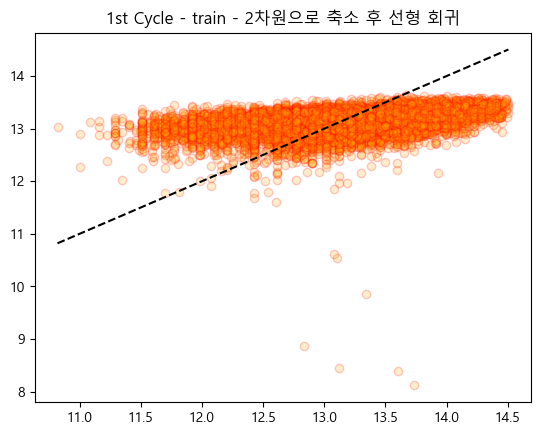

In [61]:
import matplotlib.pyplot as plt

# 모델로 train 데이터 예측 후 평가
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('1st Cycle - train - 2차원으로 축소 후 선형 회귀')
plt.show()

MSE: 0.2611, RMSE: 0.5109, MSLE: 0.0013, RMSLE: 0.0367, R2: 0.1349


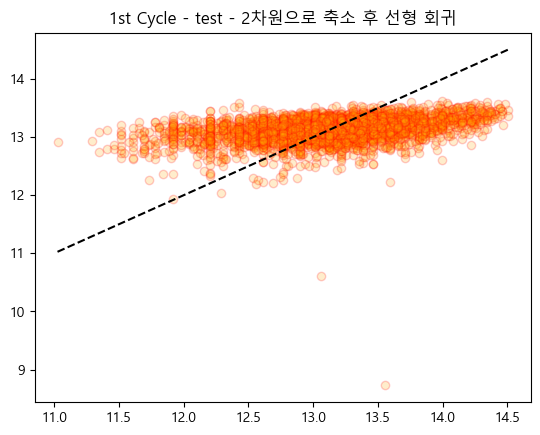

In [62]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('1st Cycle - test - 2차원으로 축소 후 선형 회귀')
plt.show()

#### 1st Cycle - 2차원으로 차원 축소 후 선형 회귀 결과
- PCA 방식으로 차원 축소 후 2차원으로 축소한 결과, R2가 매우 크게 감소함
- 따라서 차원을 5차원으로 설정한 뒤 다시 학습

#### 1st Cycle - 5차원으로 차원 축소

In [63]:
from sklearn.decomposition import PCA

# 차원 축소 후 목표 차원을 5차원으로 설정
pca = PCA(n_components=5)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.transform(test_df.iloc[:, :-1])

# 차원 축소 여부 확인
print(pca_train.shape, pca_test.shape)

(14207, 5) (3552, 5)


In [64]:
# 차원 축소된 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df.target

In [65]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)

,pca1,pca2,pca3,pca4,pca5,target
0,-19831.075573,410.952367,-443.151408,222.656517,-367.957418,13.790194
1,-46119.652219,-2368.879921,-293.476676,153.663430,-197.383126,14.346139
2,-57160.073989,87.853604,148.080177,-478.045304,-246.842477,13.171536
3,25385.436009,1197.258815,1114.636331,-225.865625,298.888887,13.221305
4,-37066.818102,203.467795,-439.945104,230.482677,-380.272168,13.696728
...,...,...,...,...,...,...
14202,-1153.563662,722.385293,1192.948096,-549.823687,-138.932676,12.429220
14203,9494.909603,-1744.913202,858.235546,-122.525169,2.510084,13.060490
14204,-11155.516971,804.773909,-343.809491,26.200484,86.074586,13.199326
14205,12772.101513,-1886.811992,515.622505,167.244170,-376.422901,14.115616


In [66]:
display(pca_test_df)

,pca1,pca2,pca3,pca4,pca5,target
0,-18193.388376,672.888677,1116.760506,-206.019752,267.476280,13.210376
1,-8030.324482,1102.606404,74.504365,355.868168,-369.678418,13.458837
2,18839.905587,1349.358986,-443.259932,-67.924516,352.379280,12.429220
3,-24285.948245,-2069.407769,-809.351108,-149.251611,-39.883733,14.038655
4,-1158.676544,1169.516912,149.889412,303.932403,-371.746595,13.764218
...,...,...,...,...,...,...
3547,13881.148518,1930.482372,-175.002778,470.612727,-106.130560,13.251637
3548,-31145.282238,1113.927819,-1038.195034,776.222801,-192.953303,14.465229
3549,15337.576463,1519.906048,-565.232494,-534.553497,13.413820,12.206078
3550,-47555.722473,513.340924,239.683807,-220.015690,121.140490,13.384729


In [67]:
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할
X_train, y_train = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

MSE: 0.2074, RMSE: 0.4554, MSLE: 0.0011, RMSLE: 0.0330, R2: 0.3387


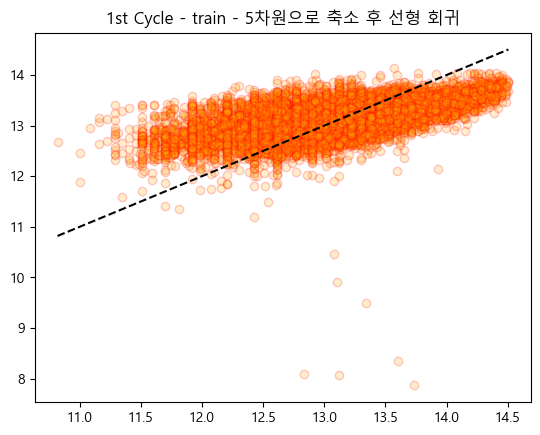

In [68]:
import matplotlib.pyplot as plt

# 모델로 train 데이터 예측 후 평가
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('1st Cycle - train - 5차원으로 축소 후 선형 회귀')
plt.show()

MSE: 0.1928, RMSE: 0.4391, MSLE: 0.0010, RMSLE: 0.0317, R2: 0.3610


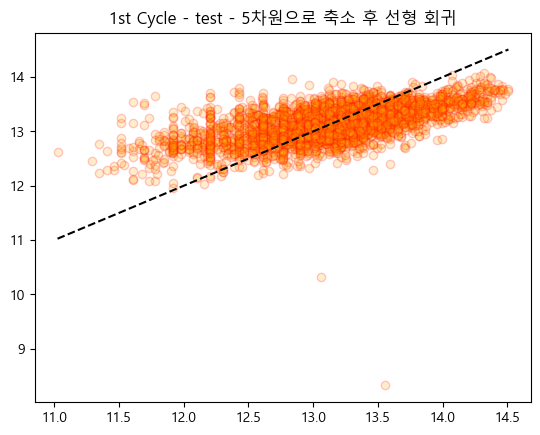

In [69]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('1st Cycle - test - 5차원으로 축소 후 선형 회귀')
plt.show()

#### 1st Cycle - 5차원으로 차원 축소 후 선형 회귀 결과
- 5차원으로 축소한 결과, 2차원일 때보다는 R2가 개선되었지만 여전히 우수하지 않은 결과를 보임
- 따라서 차원을 8차원으로 설정한 뒤 다시 학습

#### 1st Cycle - 8차원으로 차원 축소

In [70]:
from sklearn.decomposition import PCA

# 차원 축소 후 목표 차원을 8차원으로 설정
pca = PCA(n_components=8)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.transform(test_df.iloc[:, :-1])

# 차원 축소 여부 확인
print(pca_train.shape, pca_test.shape)

(14207, 8) (3552, 8)


In [71]:
# 차원 축소된 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df.target

In [72]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,target
0,-19831.075573,410.952367,-443.151408,222.656517,-367.957418,71.752672,-10.065380,75.039405,13.790194
1,-46119.652219,-2368.879921,-293.476676,153.663430,-197.383126,-89.496363,-105.463677,118.718497,14.346139
2,-57160.073989,87.853604,148.080177,-478.045304,-246.842477,75.080125,-35.950488,-116.267840,13.171536
3,25385.436009,1197.258815,1114.636331,-225.865625,298.888887,107.805342,-31.459529,26.970810,13.221305
4,-37066.818102,203.467795,-439.945104,230.482677,-380.272168,73.030404,-11.630039,67.408816,13.696728
...,...,...,...,...,...,...,...,...,...
14202,-1153.563662,722.385293,1192.948096,-549.823687,-138.932676,47.762945,-63.665501,-76.667771,12.429220
14203,9494.909603,-1744.913202,858.235546,-122.525169,2.510084,234.412782,153.607732,41.586208,13.060490
14204,-11155.516971,804.773909,-343.809491,26.200484,86.074586,98.589174,23.922111,12.766579,13.199326
14205,12772.101513,-1886.811992,515.622505,167.244170,-376.422901,158.229828,-3.727181,255.936226,14.115616


In [73]:
display(pca_test_df)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,target
0,-18193.388376,672.888677,1116.760506,-206.019752,267.476280,111.194419,-35.263063,7.586462,13.210376
1,-8030.324482,1102.606404,74.504365,355.868168,-369.678418,-149.458318,-23.889056,1.464276,13.458837
2,18839.905587,1349.358986,-443.259932,-67.924516,352.379280,152.615215,15.259938,-62.174210,12.429220
3,-24285.948245,-2069.407769,-809.351108,-149.251611,-39.883733,-10.191547,141.252512,-65.843814,14.038655
4,-1158.676544,1169.516912,149.889412,303.932403,-371.746595,211.319007,50.544702,114.472301,13.764218
...,...,...,...,...,...,...,...,...,...
3547,13881.148518,1930.482372,-175.002778,470.612727,-106.130560,-3.634450,-72.471677,-18.900531,13.251637
3548,-31145.282238,1113.927819,-1038.195034,776.222801,-192.953303,155.068524,-95.152272,95.875497,14.465229
3549,15337.576463,1519.906048,-565.232494,-534.553497,13.413820,87.609817,-32.433391,-4.069201,12.206078
3550,-47555.722473,513.340924,239.683807,-220.015690,121.140490,-258.910179,137.792790,5.765854,13.384729


In [74]:
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할
X_train, y_train = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

MSE: 0.1635, RMSE: 0.4044, MSLE: 0.0009, RMSLE: 0.0293, R2: 0.4785


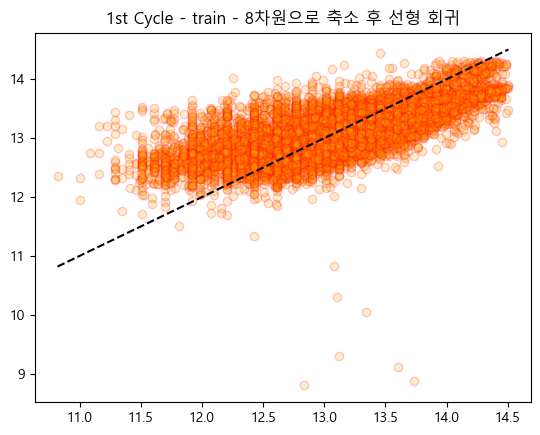

In [75]:
import matplotlib.pyplot as plt

# 모델로 train 데이터 예측 후 평가
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('1st Cycle - train - 8차원으로 축소 후 선형 회귀')
plt.show()

MSE: 0.1515, RMSE: 0.3892, MSLE: 0.0008, RMSLE: 0.0281, R2: 0.4981


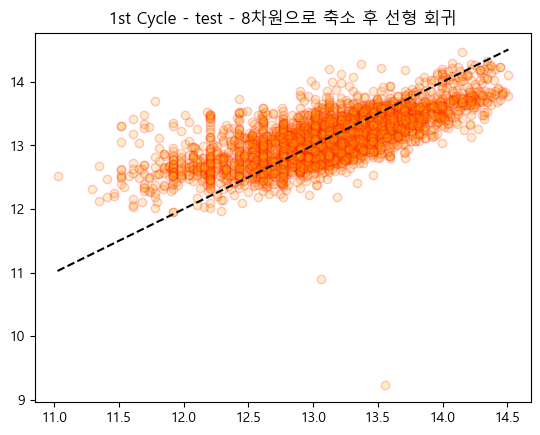

In [76]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('1st Cycle - test - 8차원으로 축소 후 선형 회귀')
plt.show()

#### 1st Cycle - PCA 방식으로 차원 축소 후 sklearn 선형 회귀 모델 학습 결과
- 차원 수를 8로 늘렸지만, R2는 0.5 미만으로  
  여전히 차원 축소 이전에 비해 심각하게 감소한 경향을 보임
- Pytorch로 차원 축소 이후 데이터 세트 학습 후,
  위 과정에서 사용한 sklearn과의 결과 비교

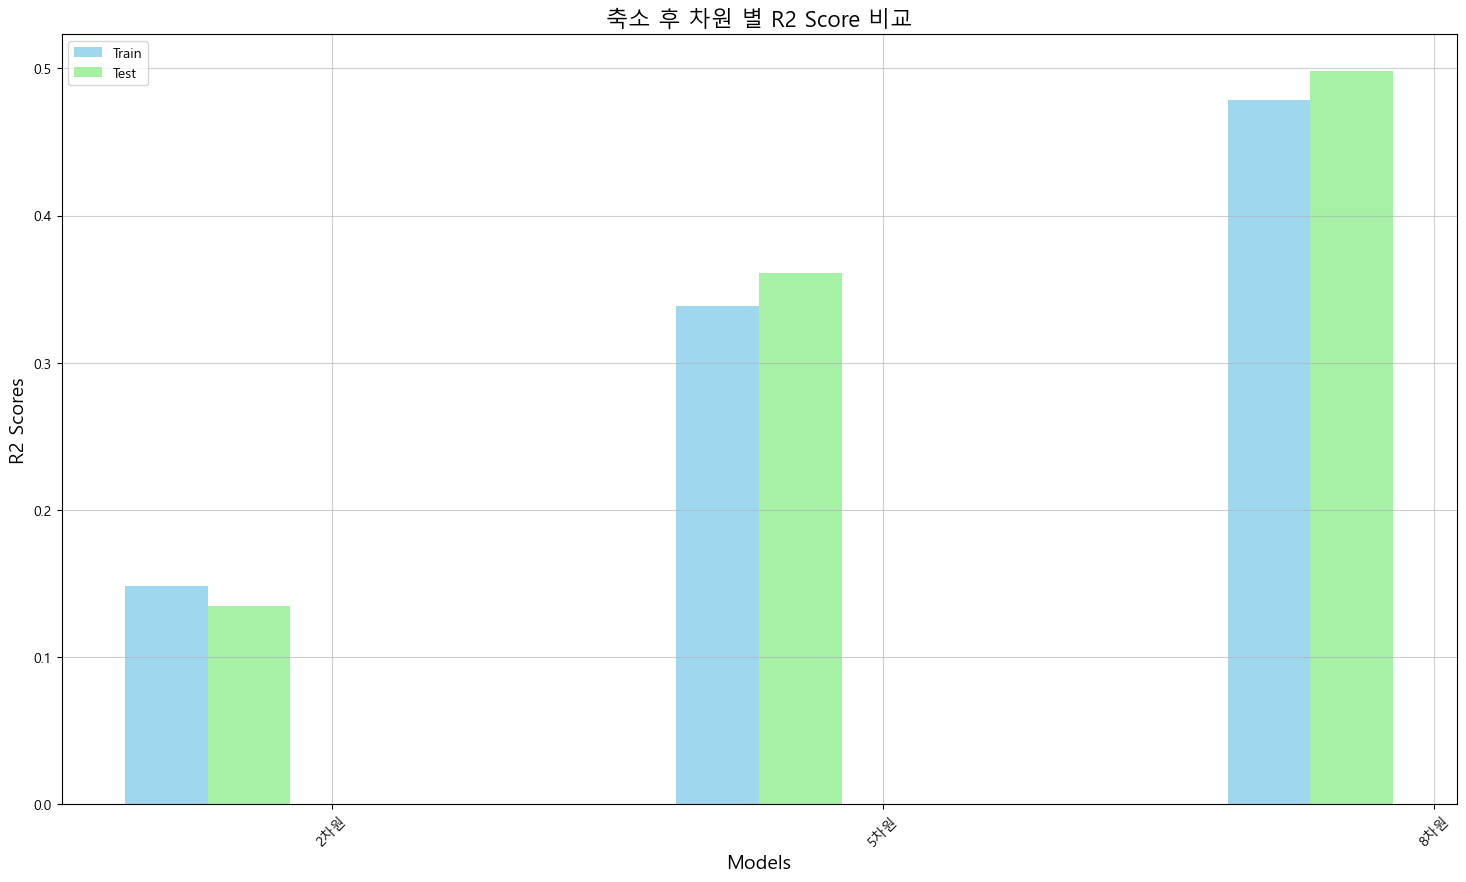

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# 축소 후 차원들
labels = ["2차원", "5차원", "8차원"]

# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 설정
n_groups = len(labels)
index = np.arange(n_groups)
bar_width = 0.15

fig, ax = plt.subplots(figsize=(18, 10))
bar1 = ax.bar(index, train_r2, bar_width, label='Train', alpha=0.8, color='skyblue')
bar2 = ax.bar(index + bar_width, test_r2, bar_width, label='Test', alpha=0.8, color='lightgreen')

# 레이블, 타이틀, 범례 설정
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('R2 Scores', fontsize=14)
ax.set_title('축소 후 차원 별 R2 Score 비교', fontsize=16)
ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# 그리드 추가
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

### 1st Cycle - Pytorch를 이용한 선형 회귀
- 데이터 세트는 위 과정으로 만들어진 pca_train_df와 pca_test_df 사용

In [78]:
from torch.nn import Module, Linear

# LinearRegressionModel 클래스 선언
class LinearRegressionModel(Module):
    # 클래스 실행 시, 매개변수 n을 전달받음
    def __init__(self, n):
        # 부모 클래스(torch.nn.Module) 실행
        super().__init__()
        # linear 재정의 - 전달받은 n 만큼 차원 설정
        self.linear = Linear(n, 1)

    # LinearRegressionModel.forward 사용 시
    def forward(self, x):
        # 위에서 재정의한 linear에 전달받은 x값 넣어서 실행
        return self.linear(x)

In [79]:
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from sklearn.model_selection import train_test_split
import numpy as np

# torch의 시드값 고정
torch.manual_seed(124)

# 데이터 세트 분할 후 Tensor 타입으로 변경
# y(정답) 데이터 세트들은 ndarray 타입이기 때문에 view를 사용해서 차원 변환
X_train = torch.FloatTensor(pca_train_df.iloc[:, :-1].values)
y_train = torch.FloatTensor(pca_train_df.target.values).view(-1, 1)
X_test = torch.FloatTensor(pca_test_df.iloc[:, :-1].values)
y_test = torch.FloatTensor(pca_test_df.target.values).view(-1, 1)

# 위 셀에서 정의한 클래스 객체 선언(8차원)
l_r = LinearRegressionModel(8)

optimizer = SGD(l_r.parameters(), lr=6e-10)

# 반복 횟수
epochs = 100000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
        print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
        print(f'loss: {np.round(loss.item(), 4)}')
        print('=' * 60)

Epoch: 10000/100000
W1: -0.0, W2: -0.0001, W3: 0.0003, W4: -0.0047, W5: 0.0031, W6: -0.2144, W7: -0.1234, W8: -0.0217, b: -0.0107
loss: 1123.3542
Epoch: 20000/100000
W1: -0.0, W2: -0.0001, W3: 0.0, W4: -0.0008, W5: 0.001, W6: -0.1725, W7: -0.1132, W8: -0.0199, b: -0.0105
loss: 807.6827
Epoch: 30000/100000
W1: -0.0, W2: -0.0001, W3: 0.0, W4: 0.0003, W5: 0.0002, W6: -0.1388, W7: -0.1038, W8: -0.0182, b: -0.0103
loss: 602.0433
Epoch: 40000/100000
W1: -0.0, W2: -0.0001, W3: 0.0, W4: 0.0006, W5: -0.0001, W6: -0.1117, W7: -0.0952, W8: -0.0166, b: -0.0102
loss: 466.279
Epoch: 50000/100000
W1: -0.0, W2: -0.0001, W3: 0.0, W4: 0.0007, W5: -0.0002, W6: -0.0899, W7: -0.0873, W8: -0.0152, b: -0.01
loss: 375.998
Epoch: 60000/100000
W1: -0.0, W2: -0.0001, W3: 0.0, W4: 0.0007, W5: -0.0002, W6: -0.0723, W7: -0.08, W8: -0.0138, b: -0.0099
loss: 315.5073
Epoch: 70000/100000
W1: -0.0, W2: -0.0001, W3: 0.0, W4: 0.0007, W5: -0.0002, W6: -0.0582, W7: -0.0734, W8: -0.0126, b: -0.0097
loss: 274.61
Epoch: 80000

In [80]:
import numpy as np
import torch
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# PyTorch 모델의 평가 지표(R2 점수 포함)를 출력해주는 함수
def get_evaluation_pytorch(y_test, prediction):
    # 만약 전달받은 인자가 Pytorch의 tensor 타입이면
    # 아래의 sklearn 메소드에서도 사용가능하도록 detach() 함수 사용
    y_test = y_test.detach().numpy() if torch.is_tensor(y_test) else y_test
    prediction = prediction.detach().numpy() if torch.is_tensor(prediction) else prediction

    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [81]:
prediction = l_r(X_test)
    
# 예측값과 실제 값 사이의 평가 지표 계산
get_evaluation_pytorch(y_test, prediction)

MSE: 208.2689, RMSE: 14.4315, R2: -689.1631


#### 이슈 발생
- Pytorch 모델 훈련 결과의 R2 Score에서 비정상적인 수치 발견
- 또한 MSLE 출력을 시도할 경우 에러 발생

#### 1st Cycle - 학습 결과
- 차원 축소 시, 차원 축소 이전에 비해 R2가 심각하게 감소하는 현상 발생
- 피드백 결과, 이는 차원 축소 이전 target과의 연관성이 낮은 feature들을 제거하지 않아서 생긴 문제라는 것을 인식함
- 따라서 다음 사이클에서는 target과의 연관성이 낮았던 feature들을 제거한 다음 학습

### 2nd Cycle - 데이터 전처리
- target과의 상관관계가 0.5 이하인 컬럼들을 전부 제거한 다음, 차원 축소 유무에 따른 학습 결과 비교

In [82]:
# 각 feature 별 target과의 상관관계 출력
pre_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                       0.741956
Width                       0.618547
Max Power Delivered         0.523028
Alloy Wheel Size            0.487393
Wheel Base                  0.483912
body                        0.432280
Turning Radius              0.419528
Length                      0.392115
Gear Box                    0.366724
Height                      0.357097
Max Torque Delivered        0.349992
Cargo Volume                0.333756
Top Speed                   0.277526
Super Charger               0.247421
Turbo Charger               0.247421
Rear Tread                  0.231008
Front Tread                 0.220910
Valves per Cylinder         0.204468
No of Cylinder              0.181408
Kerb Weight                 0.155873
Compression Ratio           0.073072
ip                          0.070492
Steering Type               0.056802
Seats                       0.030047
Ground Clearance Unladen    0.010709
Doors                      -0.004812
Max Power At               -0.019154
G

In [83]:
# target과의 상관관계를 변수에 할당(pandas.Series 타입)
target_corr = pre_c_df.corr()['target'].sort_values(ascending=False)[1:]

# 상관관계 0.5이하인 컬럼만 담을 빈 리스트 선언
low_columns = []

# Series에는 딕셔너리와 유사하기 때문에 keys로 각 컬럼명 불러오는 것이 가능
for column in target_corr.keys():
    if (target_corr[column] <= 0.5) & (target_corr[column] >= -0.5):
        low_columns.append(column)

# 상관관계 0.5 이하인 feature만 담긴 리스트 출력
low_columns

['Alloy Wheel Size',
 'Wheel Base',
 'body',
 'Turning Radius',
 'Length',
 'Gear Box',
 'Height',
 'Max Torque Delivered',
 'Cargo Volume',
 'Top Speed',
 'Super Charger',
 'Turbo Charger',
 'Rear Tread',
 'Front Tread',
 'Valves per Cylinder',
 'No of Cylinder',
 'Kerb Weight',
 'Compression Ratio',
 'ip',
 'Steering Type',
 'Seats',
 'Ground Clearance Unladen',
 'Doors',
 'Max Power At',
 'Gross Weight',
 'oem',
 'Tyre Type',
 'model',
 'variant',
 'fuel',
 'Engine Type',
 'Drive Type',
 'Max Torque At',
 'Bore',
 'Fuel Suppy System',
 'utype',
 'carType',
 'Front Brake Type',
 'Rear Brake Type',
 'owner_type',
 'Acceleration',
 'transmission',
 'km']

In [84]:
# low_columns 내 feature들을 삭제한 새로운 데이터 세트 생성 
sec_c_df = pre_c_df.drop(labels=low_columns, axis=1)
sec_c_df

,myear,Width,Max Power Delivered,target
0,2015,1600.0,58.20,12.807655
1,2017,1660.0,65.39,13.049795
2,2018,1600.0,58.33,12.959847
3,2019,1600.0,58.33,12.847929
4,2017,1695.0,80.46,13.586099
...,...,...,...,...
17754,2018,1647.0,69.00,13.038984
17755,2019,1894.0,138.10,14.072476
17756,2011,1703.0,88.80,12.409018
17757,2014,1665.0,69.00,12.323860


In [85]:
# 현재 각 feature 별 target과의 상관관계 출력
sec_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                  0.741956
Width                  0.618547
Max Power Delivered    0.523028
Name: target, dtype: float64

### 2nd Cycle - 차원 축소 없이 선형 회귀
- PCA 차원 축소 후 결과와 비교 분석

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 세트 분할 후 선형 회귀 모델로 훈련
features, targets = sec_c_df.iloc[:, :-1], sec_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [87]:
# 테스트 데이터 예측 후 평가
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.0584, RMSE: 0.2416, MSLE: 0.0003, RMSLE: 0.0174, R2: 0.8066


#### 과적합 발생 여부 확인

MSE: 0.0618, RMSE: 0.2485, MSLE: 0.0003, RMSLE: 0.0179, R2: 0.8030


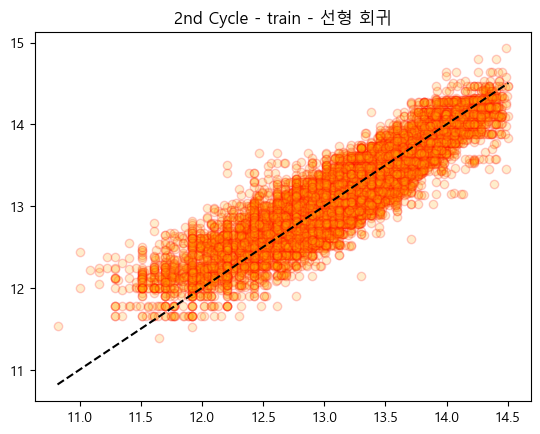

In [88]:
import matplotlib.pyplot as plt

# 모델 훈련 후 train 데이터 예측하고 평가
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('2nd Cycle - train - 선형 회귀')
plt.show()

MSE: 0.0584, RMSE: 0.2416, MSLE: 0.0003, RMSLE: 0.0174, R2: 0.8066


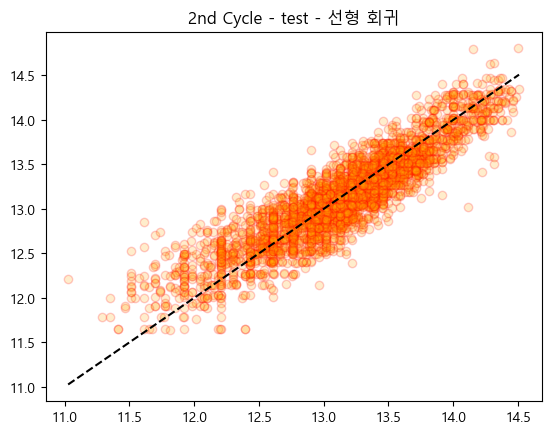

In [89]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('2nd Cycle - test - 선형 회귀')
plt.show()

#### 2nd Cycle - 차원 축소 없이 선형 회귀한 결과
- 이전 사이클과 마찬가지로, train 데이터와 test 데이터의 R2와 오차가 큰 차이를 보이지 않음
- 따라서 현재 모델에는 과적합이 발생하지 않은 것으로 추정되며,  
  R2는 약 0.82 정도로 우수한 성능을 보임

### 2nd Cycle - 다항 회귀 모델로 회귀
- 별도의 차원 축소 없이 현재 데이터 세트 그대로 사용하여 Polynomial로 다항 회귀 진행
- 만약 이 과정과 트리 모델 학습 결과가 선형 모델에 비해 아쉬운 결과를 보인다면,  
  처음 방식대로 pre_c_df의 차원 축소를 통한 학습도 고려

In [90]:
# 아래 모델의 train, test 데이터 각각의 R2를 담을 빈 리스트 선언
train_r2 = []
test_r2 = []

#### 2nd Cycle - 2차식 다항 회귀 

In [91]:
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분할
features, targets = sec_c_df.iloc[:, :-1], sec_c_df.iloc[:, -1]

# features를 다항식(현재 2차)에 알맞은 형태로 변경한 poly_features 선언
poly_features = PolynomialFeatures(degree=2).fit_transform(features)

# features 대신 poly_features를 사용하여 train, test 데이터 생성 
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델로 학습
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

MSE: 0.0567, RMSE: 0.2380, MSLE: 0.0003, RMSLE: 0.0172, R2: 0.8193


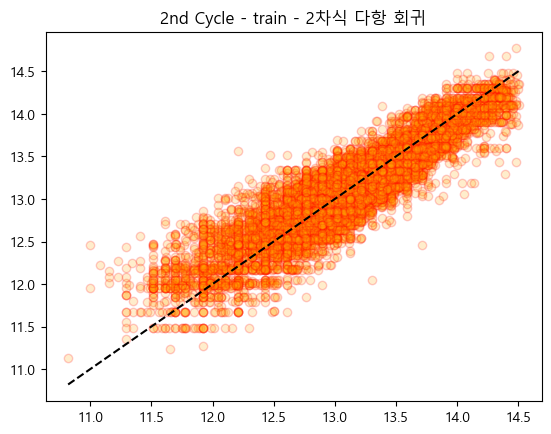

In [92]:
import matplotlib.pyplot as plt

# 모델 훈련 후 train 데이터 예측하고 평가
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('2nd Cycle - train - 2차식 다항 회귀')
plt.show()

MSE: 0.0544, RMSE: 0.2331, MSLE: 0.0003, RMSLE: 0.0168, R2: 0.8199


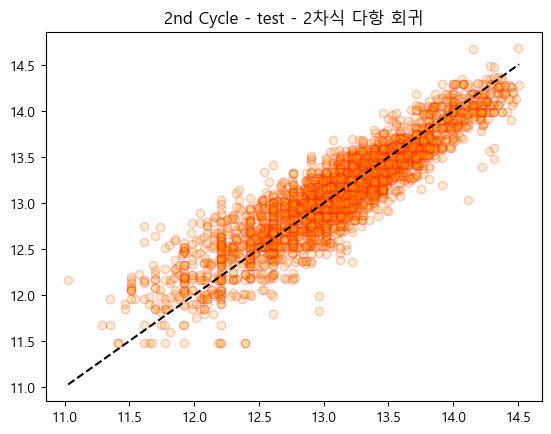

In [93]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('2nd Cycle - test - 2차식 다항 회귀')
plt.show()

#### 2nd Cycle - 2차식 다항 회귀 결과
- 회귀선이 선형일 때에 비해 약간 향상된 결과를 보임
- 회귀선 차수를 늘려 결과 비교

#### 2nd Cycle - 3차식 다항 회귀 

In [94]:
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분할
features, targets = sec_c_df.iloc[:, :-1], sec_c_df.iloc[:, -1]

# features를 다항식(현재 3차)에 알맞은 형태로 변경한 poly_features 선언
poly_features = PolynomialFeatures(degree=3).fit_transform(features)

# features 대신 poly_features를 사용하여 train, test 데이터 생성 
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델로 학습
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

MSE: 0.0553, RMSE: 0.2351, MSLE: 0.0003, RMSLE: 0.0170, R2: 0.8238


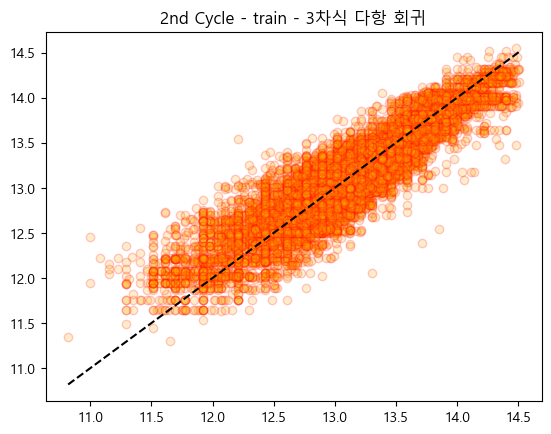

In [95]:
import matplotlib.pyplot as plt

# 모델 훈련 후 train 데이터 예측하고 평가
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('2nd Cycle - train - 3차식 다항 회귀')
plt.show()

MSE: 0.0530, RMSE: 0.2303, MSLE: 0.0003, RMSLE: 0.0166, R2: 0.8242


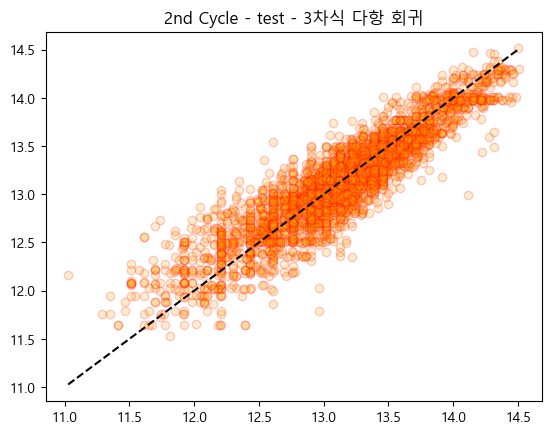

In [96]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('2nd Cycle - test - 3차식 다항 회귀')
plt.show()

#### 2nd Cycle - 3차식 다항 회귀 결과
- 회귀선의 차수가 2차일 때보다 더욱 향상된 결과를 보임
- 차수를 더욱 올려서 비교

#### 2nd Cycle - 4차식 다항 회귀 

In [97]:
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분할
features, targets = sec_c_df.iloc[:, :-1], sec_c_df.iloc[:, -1]

# features를 다항식(현재 4차)에 알맞은 형태로 변경한 poly_features 선언
poly_features = PolynomialFeatures(degree=4).fit_transform(features)

# features 대신 poly_features를 사용하여 train, test 데이터 생성 
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델로 학습
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

MSE: 0.0545, RMSE: 0.2335, MSLE: 0.0003, RMSLE: 0.0169, R2: 0.8261


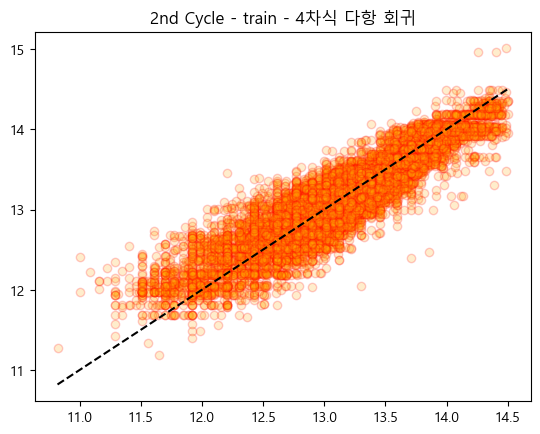

In [98]:
import matplotlib.pyplot as plt

# 모델 훈련 후 train 데이터 예측하고 평가
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('2nd Cycle - train - 4차식 다항 회귀')
plt.show()

MSE: 0.0525, RMSE: 0.2290, MSLE: 0.0003, RMSLE: 0.0165, R2: 0.8262


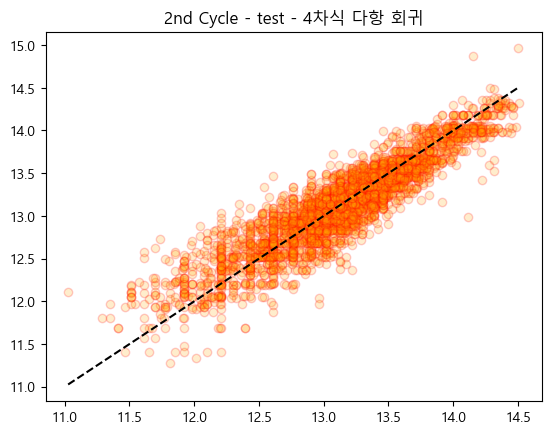

In [99]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('2nd Cycle - test - 4차식 다항 회귀')
plt.show()

#### 2nd Cycle - 4차식 다항 회귀 결과
- 회귀선 차수가 3차일 때에 비해 더욱 향상된 결과를 보임

#### 2nd Cycle - 5차식 다항 회귀 

In [100]:
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분할
features, targets = sec_c_df.iloc[:, :-1], sec_c_df.iloc[:, -1]

# features를 다항식(현재 5차)에 알맞은 형태로 변경한 poly_features 선언
poly_features = PolynomialFeatures(degree=5).fit_transform(features)

# features 대신 poly_features를 사용하여 train, test 데이터 생성 
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델로 학습
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

MSE: 0.0521, RMSE: 0.2282, MSLE: 0.0003, RMSLE: 0.0165, R2: 0.8339


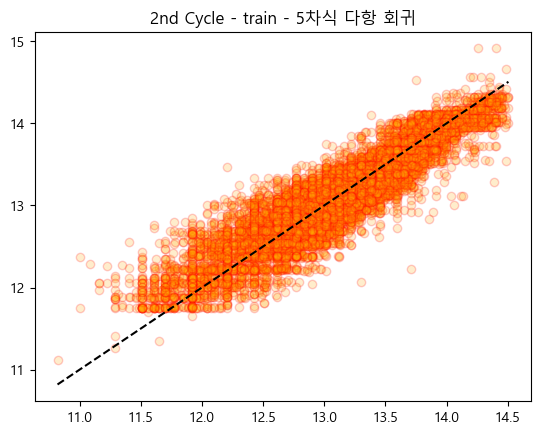

In [101]:
import matplotlib.pyplot as plt

# 모델 훈련 후 train 데이터 예측하고 평가
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('2nd Cycle - train - 5차식 다항 회귀')
plt.show()

MSE: 0.0512, RMSE: 0.2263, MSLE: 0.0003, RMSLE: 0.0164, R2: 0.8303


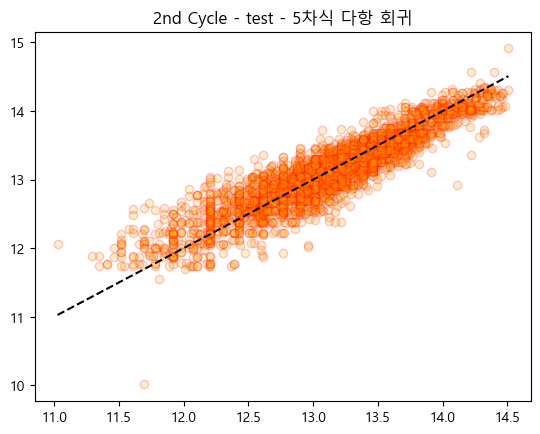

In [102]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('2nd Cycle - test - 5차식 다항 회귀')
plt.show()

#### 2nd Cycle - 5차식 다항 회귀 결과
- 회귀선 차수가 4차일 때에 비해 더욱 향상된 결과를 보임
- 다만, train과 test 데이터의 예측 결과를 비교했을 때 모델의 과적합 경향 역시 근소하게 증가

#### 2nd Cycle - 6차식 다항 회귀

In [103]:
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분할
features, targets = sec_c_df.iloc[:, :-1], sec_c_df.iloc[:, -1]

# features를 다항식(현재 6차)에 알맞은 형태로 변경한 poly_features 선언
poly_features = PolynomialFeatures(degree=6).fit_transform(features)

# features 대신 poly_features를 사용하여 train, test 데이터 생성 
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델로 학습
l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

MSE: 0.0506, RMSE: 0.2250, MSLE: 0.0003, RMSLE: 0.0162, R2: 0.8385


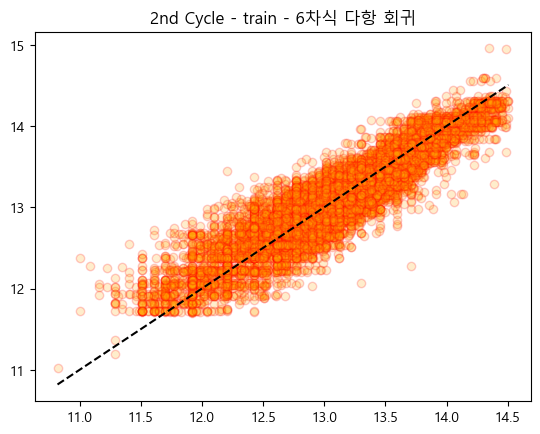

In [104]:
import matplotlib.pyplot as plt

# 모델 훈련 후 train 데이터 예측하고 평가
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))

# train 데이터 분포 시각화
fig, ax = plt.subplots()

# 실제값과 예측값에 따른 분포를 산점도로 시각화
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)

# y = x 그래프를 점선으로 시각화
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title('2nd Cycle - train - 6차식 다항 회귀')
plt.show()

MSE: 0.0516, RMSE: 0.2271, MSLE: 0.0003, RMSLE: 0.0163, R2: 0.8290


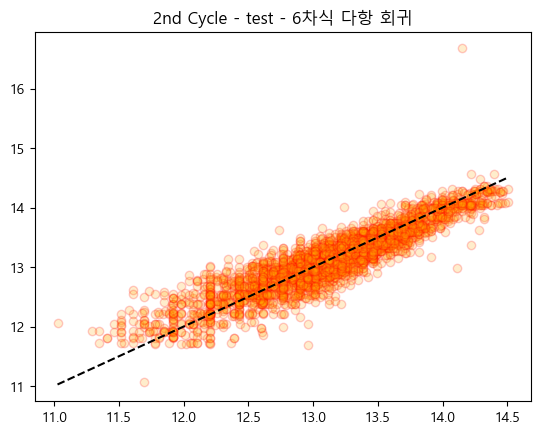

In [105]:
import matplotlib.pyplot as plt

# 같은 모델로 test 데이터 예측 결과 시각화
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('2nd Cycle - test - 6차식 다항 회귀')
plt.show()

#### 2nd Cycle - 6차식 다항 회귀 결과
- 회귀선 차수가 5차일 때에 비해 더욱 향상된 결과를 보임
- 다만, 오차와 R2의 변화 추이로 보아 이 이상 차수를 올리면  
  test 데이터의 예측 성능이 점점 감소할 것으로 보이며, 이는 모델 성능의 감소를 의미함

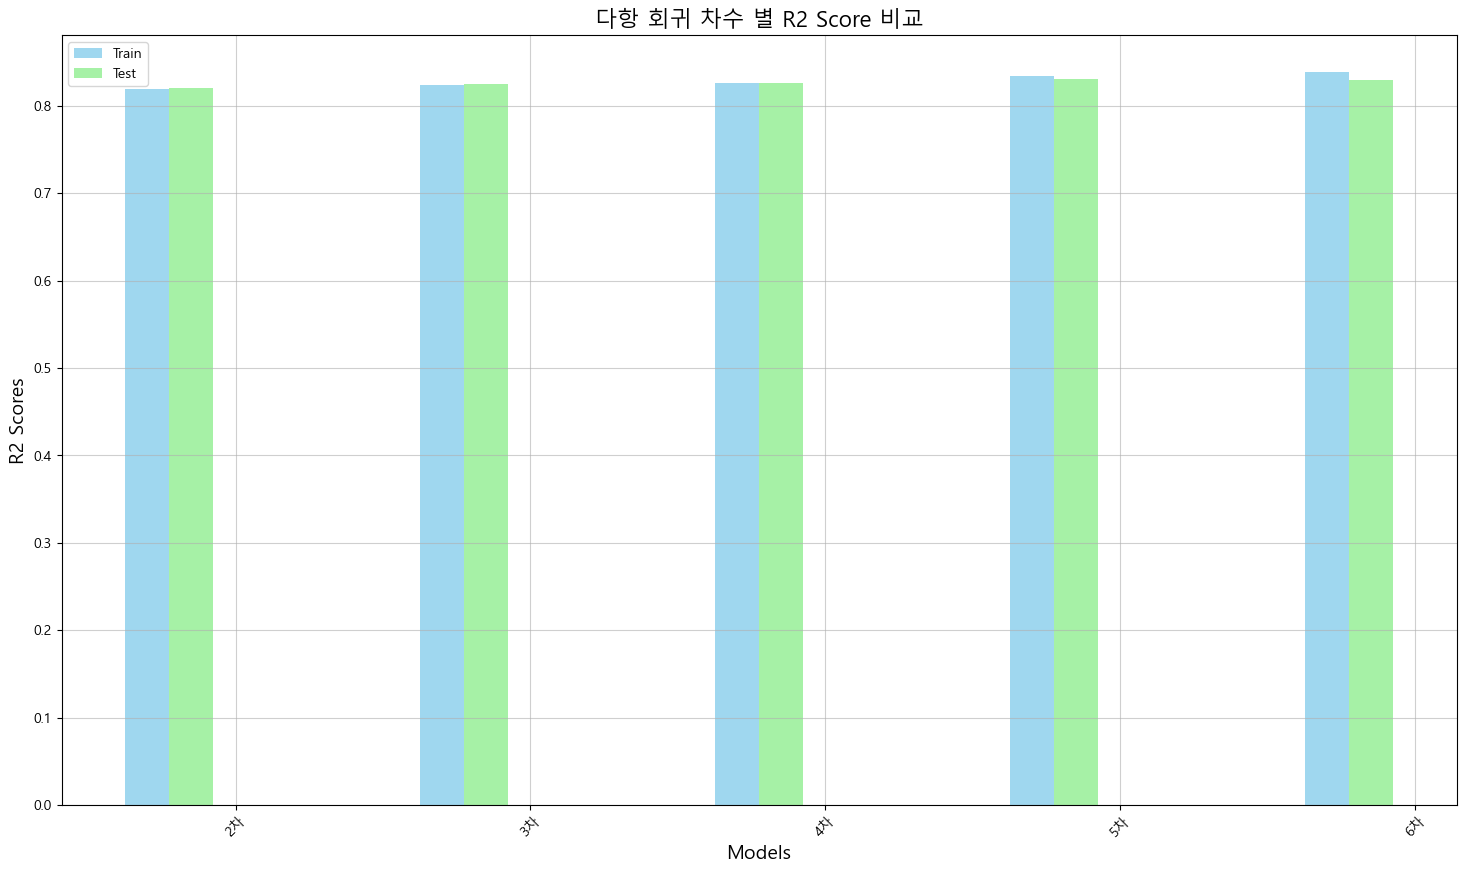

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# 다항식 차수
labels = ["2차", "3차", "4차", "5차", "6차"]

# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 설정
n_groups = len(labels)
index = np.arange(n_groups)
bar_width = 0.15

fig, ax = plt.subplots(figsize=(18, 10))
bar1 = ax.bar(index, train_r2, bar_width, label='Train', alpha=0.8, color='skyblue')
bar2 = ax.bar(index + bar_width, test_r2, bar_width, label='Test', alpha=0.8, color='lightgreen')

# 레이블, 타이틀, 범례 설정
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('R2 Scores', fontsize=14)
ax.set_title('다항 회귀 차수 별 R2 Score 비교', fontsize=16)
ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# 그리드 추가
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

#### 2nd Cycle - 다항 회귀 모델 학습 결과
- 회귀선의 차수를 6차까지 올려본 결과, 차수가 올라갈 수록 모델의 성능 역시 향상됨
- 다만, 회귀선의 차수가 5차를 넘어갔을 때부터 test 데이터 예측 결과가  
  train 데이터에 비해 낮아진 현상 역시 발견되었고, 이는 해당 시점부터 과적합 경향이 생긴 것으로 추정

### 2nd Cycle - 비선형 트리 모델로 회귀
- Decision Tree, Random Forest, Gradient Boosting, XGB, LightGBM 모델로 학습 후 각 모델의 결과 비교
- 위 과정으로 생성한 poly_features와 병행하지 않고, 원래의 features로 데이터 분할

In [107]:
# 아래 모델의 train, test 데이터 각각의 R2를 담을 빈 리스트 선언
train_r2 = []
test_r2 = []

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
features, targets = sec_c_df.iloc[:, :-1], sec_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 사용할 모델 객체들 선언
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

# 위의 모델 객체를 파이썬 리스트에 담기
models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

# 위 모델들을 순차적으로 학습 후 결과 도출
for model in models:
    model.fit(X_train, y_train)
    print(model.__class__.__name__)
    print('-' * 40)
    
    print('Train 데이터 예측 결과')
    prediction = model.predict(X_train)
    get_evaluation(y_train, prediction)
    train_r2.append(r2_score(y_train, prediction))
    print('-' * 40)
    
    print('Test 데이터 예측 결과')
    prediction = model.predict(X_test)
    get_evaluation(y_test, prediction)
    test_r2.append(r2_score(y_test, prediction))
    print('=' * 80)

DecisionTreeRegressor
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0303, RMSE: 0.1741, MSLE: 0.0002, RMSLE: 0.0126, R2: 0.9034
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0382, RMSE: 0.1956, MSLE: 0.0002, RMSLE: 0.0142, R2: 0.8733
RandomForestRegressor
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0307, RMSE: 0.1751, MSLE: 0.0002, RMSLE: 0.0126, R2: 0.9022
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0370, RMSE: 0.1924, MSLE: 0.0002, RMSLE: 0.0139, R2: 0.8773
GradientBoostingRegressor
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0432, RMSE: 0.2079, MSLE: 0.0002, RMSLE: 0.0150, R2: 0.8621
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0425, RMSE: 0.2062, MSLE: 0.0002, RMSLE: 0.0149, R2: 0.8591
XGBRegressor
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0314, RMSE: 0.1773, MSLE: 0.0002, RMSLE: 0.0128, R2: 0.8998
----------------------------------------
Test 데이터 예측

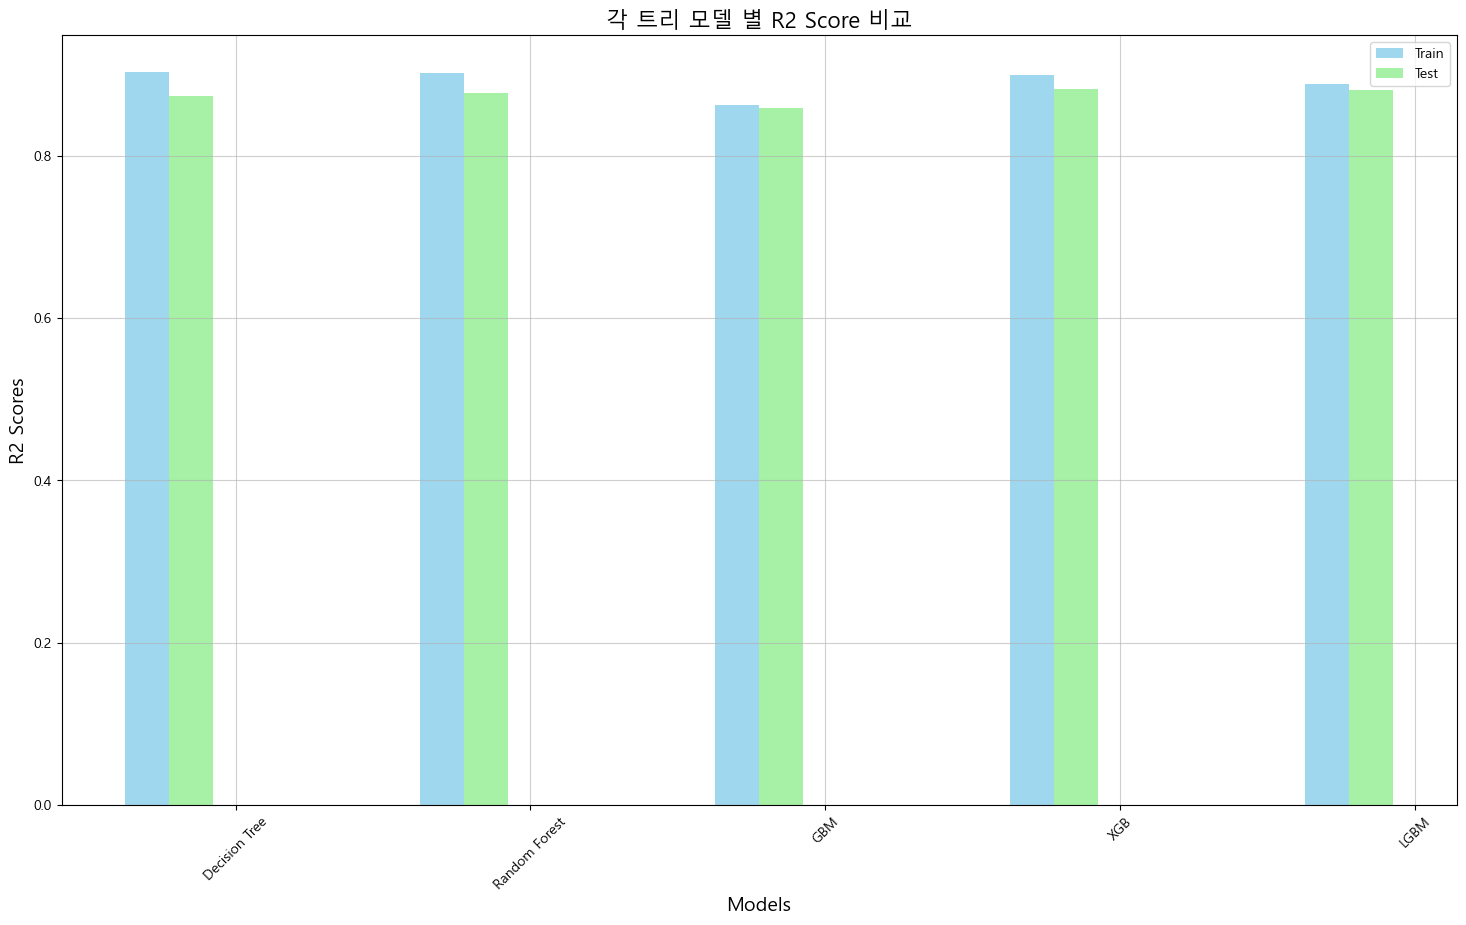

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# 위에서 사용한 모델명
models = ["Decision Tree", "Random Forest", "GBM", "XGB", "LGBM"]

# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 설정
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.15

fig, ax = plt.subplots(figsize=(18, 10))
bar1 = ax.bar(index, train_r2, bar_width, label='Train', alpha=0.8, color='skyblue')
bar2 = ax.bar(index + bar_width, test_r2, bar_width, label='Test', alpha=0.8, color='lightgreen')

# 레이블, 타이틀, 범례 설정
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('R2 Scores', fontsize=14)
ax.set_title('각 트리 모델 별 R2 Score 비교', fontsize=16)
ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# 그리드 추가
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

#### 2nd Cycle - 비선형 모델 회귀 결과
- 현재 test 데이터에 대한 예측 성능이 가장 우수한 것은 XGB 모델로, 약 0.87 정도의 R2 Score를 기록함

- train과 test 데이터의 학습 결과에서 가장 적은 차이를 보인 것은 Gradient Boosting 모델로,  
  test 데이터 예측 결과의 R2는 이번에 사용한 모델 중 가장 낮은 약 0.85를 기록함

#### 2nd Cycle - 학습 결과
- 상관관계가 낮은 feature들을 제거함으로서 우수한 지표를 가진 모델이 만들어졌지만,  
  전처리 과정에서 중요한 feature들이 다수 소실됨
- 따라서 다음 사이클에서는 소실되었던 feature들 중 중요한 feature들을 하나씩 추가,  
  화이트 노이즈(편향)를 발생시켜 R2를 0.8 근처로 조정하는 것을 목표로 할 것

### 3rd Cycle - 데이터 전처리
- 이전 사이클에서 소실된 feature 중 일부를 복구

- 복구할 feature의 기준
> - 기존 또는 추가할 feature들과 의미가 중첩되지 않는 feature
> - 그 외, 중고차 가격 분석에 필요할 것이라 생각되는 feature

- 이 과정 이후, 차원 수가 8개 이상이 되면 PCA 방식으로 차원 축소 실행
> - 첫 사이클에 비해 feature 수가 많이 줄어든 상태이기 때문에 차원 축소 전후의 R2는 큰 변동이 없을 것으로 기대

In [110]:
# 이전 사이클에 사용했던 데이터 세트 확인
sec_c_df

,myear,Width,Max Power Delivered,target
0,2015,1600.0,58.20,12.807655
1,2017,1660.0,65.39,13.049795
2,2018,1600.0,58.33,12.959847
3,2019,1600.0,58.33,12.847929
4,2017,1695.0,80.46,13.586099
...,...,...,...,...
17754,2018,1647.0,69.00,13.038984
17755,2019,1894.0,138.10,14.072476
17756,2011,1703.0,88.80,12.409018
17757,2014,1665.0,69.00,12.323860


### 3rd Cycle - 복구할 feature들
- 상관관계와 feature의 의미를 검토하여, pre_c_df에서 가져와 복구할 feature 7개를 선정
> - Cargo Volume: 차량 내 적재 공간
> - Top Speed: 최고 속도 (km/h)
> - transmission: 변속기 종류 (자동, 수동 등)
> - owner_type: 차량의 이전 소유주 수
> - fuel: 연료 (휘발, 경유, 천연가스 등)
> - Valves per Cylinder: 엔진 내 실린더 하나 당 밸브 수
> - utype: 판매자 유형 (딜러 / 개인)

- 위 feature들을 하나씩 추가, 이전 사이클에서 가장 우수한 결과를 보인 트리 모델로 학습시켜 결과의 변화 추이 분석

#### Cargo Volume 복구

In [111]:
# pre_c_df에 있는 Cargo Volume을 이전 사이클의 데이터 세트에 추가
add_features = pre_c_df[['Cargo Volume']]

trd_c_df = pd.concat([add_features, sec_c_df], axis=1)
trd_c_df

,Cargo Volume,myear,Width,Max Power Delivered,target
0,235.0,2015,1600.0,58.20,12.807655
1,256.0,2017,1660.0,65.39,13.049795
2,235.0,2018,1600.0,58.33,12.959847
3,235.0,2019,1600.0,58.33,12.847929
4,135.0,2017,1695.0,80.46,13.586099
...,...,...,...,...,...
17754,242.0,2018,1647.0,69.00,13.038984
17755,425.0,2019,1894.0,138.10,14.072476
17756,460.0,2011,1703.0,88.80,12.409018
17757,220.0,2014,1665.0,69.00,12.323860


In [112]:
# target과의 상관관계 출력 - pre_c_df와 동일한지 확인하는 것이 목적
trd_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                  0.741956
Width                  0.618547
Max Power Delivered    0.523028
Cargo Volume           0.333756
Name: target, dtype: float64

#### 중간 분석
- pre_c_df에 있었을 때와 target과의 상관관계가 동일한 것을 확인

#### 트리 모델로 학습
- 이전 사이클에서 GBM이 학습에 가장 우수한 결과를 보여줌에 따라,  
  이번 사이클에서는 GBM 모델의 R2를 0.8 전후로 맞추는 것을 목표로 함

In [113]:
# 아래 모델의 train, test 데이터 각각의 R2를 담을 빈 리스트 선언
train_r2 = []
test_r2 = []

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
features, targets = trd_c_df.iloc[:, :-1], trd_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0409, RMSE: 0.2021, MSLE: 0.0002, RMSLE: 0.0146, R2: 0.8697
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0396, RMSE: 0.1990, MSLE: 0.0002, RMSLE: 0.0144, R2: 0.8688


#### 3rd Cycle - Cargo Volume 복구 결과
- 전반적으로 모델의 성능이 향상됨
- 따라서 바로 다음 feature 추가

#### Top Speed 복구

In [115]:
# pre_c_df에 있는 Top Speed를 데이터 세트에 추가
add_features = pre_c_df[['Top Speed']]

trd_c_df = pd.concat([add_features, trd_c_df], axis=1)
trd_c_df

,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,150.0,235.0,2015,1600.0,58.20,12.807655
1,165.0,256.0,2017,1660.0,65.39,13.049795
2,150.0,235.0,2018,1600.0,58.33,12.959847
3,150.0,235.0,2019,1600.0,58.33,12.847929
4,164.0,135.0,2017,1695.0,80.46,13.586099
...,...,...,...,...,...,...
17754,150.0,242.0,2018,1647.0,69.00,13.038984
17755,170.0,425.0,2019,1894.0,138.10,14.072476
17756,170.0,460.0,2011,1703.0,88.80,12.409018
17757,155.0,220.0,2014,1665.0,69.00,12.323860


In [116]:
# target과의 상관관계 출력 - pre_c_df와 동일한지 확인하는 것이 목적
trd_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                  0.741956
Width                  0.618547
Max Power Delivered    0.523028
Cargo Volume           0.333756
Top Speed              0.277526
Name: target, dtype: float64

#### 트리 모델로 학습

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
features, targets = trd_c_df.iloc[:, :-1], trd_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0402, RMSE: 0.2006, MSLE: 0.0002, RMSLE: 0.0145, R2: 0.8717
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0397, RMSE: 0.1993, MSLE: 0.0002, RMSLE: 0.0144, R2: 0.8684


#### 3rd Cycle - Top Speed 복구 결과
- 이전에 비해 모델 성능이 더욱 향상된 것을 확인
- feature가 늘어나면서 성능이 점차 향상되는 것으로 추정

#### transmission 복구

In [118]:
# pre_c_df에 있는 transmission을 데이터 세트에 추가
add_features = pre_c_df[['transmission']]

trd_c_df = pd.concat([add_features, trd_c_df], axis=1)
trd_c_df

,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,1,150.0,235.0,2015,1600.0,58.20,12.807655
1,1,165.0,256.0,2017,1660.0,65.39,13.049795
2,1,150.0,235.0,2018,1600.0,58.33,12.959847
3,1,150.0,235.0,2019,1600.0,58.33,12.847929
4,1,164.0,135.0,2017,1695.0,80.46,13.586099
...,...,...,...,...,...,...,...
17754,1,150.0,242.0,2018,1647.0,69.00,13.038984
17755,1,170.0,425.0,2019,1894.0,138.10,14.072476
17756,1,170.0,460.0,2011,1703.0,88.80,12.409018
17757,1,155.0,220.0,2014,1665.0,69.00,12.323860


In [119]:
# target과의 상관관계 출력 - pre_c_df와 동일한지 확인하는 것이 목적
trd_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                  0.741956
Width                  0.618547
Max Power Delivered    0.523028
Cargo Volume           0.333756
Top Speed              0.277526
transmission          -0.307764
Name: target, dtype: float64

#### 트리 모델로 학습

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
features, targets = trd_c_df.iloc[:, :-1], trd_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0389, RMSE: 0.1971, MSLE: 0.0002, RMSLE: 0.0143, R2: 0.8761
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0383, RMSE: 0.1958, MSLE: 0.0002, RMSLE: 0.0142, R2: 0.8730


#### 3rd Cycle - transmission 복구 결과
- 이전에 비해 모델 성능이 더욱 향상됨

#### owner_type 복구
- 이번 데이터 세트부터 차원 축소도 병행하면서  
  차원 축소 전후의 모델 성능 비교

In [121]:
# pre_c_df에 있는 owner_type을 데이터 세트에 추가
add_features = pre_c_df[['owner_type']]

trd_c_df = pd.concat([add_features, trd_c_df], axis=1)
trd_c_df

,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,1,1,150.0,235.0,2015,1600.0,58.20,12.807655
1,1,1,165.0,256.0,2017,1660.0,65.39,13.049795
2,1,1,150.0,235.0,2018,1600.0,58.33,12.959847
3,1,1,150.0,235.0,2019,1600.0,58.33,12.847929
4,1,1,164.0,135.0,2017,1695.0,80.46,13.586099
...,...,...,...,...,...,...,...,...
17754,1,1,150.0,242.0,2018,1647.0,69.00,13.038984
17755,1,1,170.0,425.0,2019,1894.0,138.10,14.072476
17756,1,1,170.0,460.0,2011,1703.0,88.80,12.409018
17757,1,1,155.0,220.0,2014,1665.0,69.00,12.323860


In [122]:
# target과의 상관관계 출력 - pre_c_df와 동일한지 확인하는 것이 목적
trd_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                  0.741956
Width                  0.618547
Max Power Delivered    0.523028
Cargo Volume           0.333756
Top Speed              0.277526
owner_type            -0.271465
transmission          -0.307764
Name: target, dtype: float64

#### 트리 모델로 학습 - 차원 축소 미실행

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
features, targets = trd_c_df.iloc[:, :-1], trd_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0383, RMSE: 0.1958, MSLE: 0.0002, RMSLE: 0.0142, R2: 0.8778
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0381, RMSE: 0.1952, MSLE: 0.0002, RMSLE: 0.0141, R2: 0.8738


#### 차원 축소
- feature 수가 어느 정도 생김에 따라 차원 축소 진행
- 차원 축소는 현재 feature 수와 모델의 계산 효율을 고려하여 2차원으로만 진행

In [124]:
# 차원 축소 이전, 훈련 데이터와 테스트 데이터를 각각 병합하여 새로운 데이터 세트 생성
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [125]:
# 훈련용, 테스트용 데이터 세트 확인
display(train_df)

,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,1,0,160.0,475.0,2018,1822.0,104.50,13.790194
1,1,1,170.0,433.0,2022,1800.0,113.43,14.346139
2,1,0,170.0,279.0,2020,1579.0,67.00,13.171536
3,1,1,165.0,256.0,2017,1660.0,81.86,13.221305
4,3,0,160.0,475.0,2017,1822.0,104.50,13.696728
...,...,...,...,...,...,...,...,...
14202,4,1,155.8,300.0,2017,1579.0,67.00,12.429220
14203,3,1,180.0,295.0,2018,1734.0,88.73,13.060490
14204,1,1,170.0,295.0,2017,1734.0,81.83,13.199326
14205,1,1,170.0,408.0,2018,1818.0,170.00,14.115616


In [126]:
display(test_df)

,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,1,0,165.0,256.0,2017,1660.0,81.86,13.210376
1,3,1,170.0,510.0,2019,1730.0,103.25,13.458837
2,3,1,148.0,284.0,2011,1680.0,70.00,12.429220
3,1,1,170.0,350.0,2021,1770.0,98.60,14.038655
4,1,1,170.0,350.0,2021,1735.0,91.19,13.764218
...,...,...,...,...,...,...,...,...
3547,3,1,195.0,510.0,2017,1695.0,117.30,13.251637
3548,1,0,170.0,430.0,2020,1799.0,139.46,14.465229
3549,3,1,170.0,175.0,2012,1680.0,86.80,12.206078
3550,3,0,170.0,268.0,2020,1735.0,81.80,13.384729


#### 2차원으로 차원 축소

In [127]:
from sklearn.decomposition import PCA

# 차원 축소 후 목표 차원을 2차원으로 설정
pca = PCA(n_components=2)

pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

# 차원 축소 여부 확인
print(pca_train.shape, pca_test.shape)

(14207, 2) (3552, 2)


In [128]:
# 차원 축소된 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df.target

In [129]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)

,pca1,pca2,target
0,146.190186,61.961186,13.790194
1,101.796902,57.473492,14.346139
2,-120.359917,-100.672862,13.171536
3,-113.658810,-15.648372,13.221305
4,146.189163,61.939814,13.696728
...,...,...,...
14202,-101.778015,-108.191247,12.429220
14203,-51.143112,40.696300,13.060490
14204,-52.803257,39.620005,13.199326
14205,92.224006,90.351298,14.115616


In [130]:
display(pca_test_df)

,pca1,pca2,target
0,-113.658184,-15.648097,13.210376
1,149.326890,-35.571968,13.458837
2,-83.871014,-8.701849,12.429220
3,12.559111,56.331880,14.038655
4,0.107429,22.846070,13.764218
...,...,...,...
3547,141.607169,-65.872097,13.251637
3548,102.291623,61.040084,14.465229
3549,-181.620526,31.581233,12.206078
3550,-77.651361,49.934853,13.384729


In [131]:
# 기존 데이터에 대한 보존률 확인 - 현재 약 97% 보존됨
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.7855779  0.19075856]
0.9763364604198108


#### 트리 모델로 학습 - 2차원으로 차원 축소

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
X_train, y_train = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0799, RMSE: 0.2826, MSLE: 0.0004, RMSLE: 0.0204, R2: 0.7454
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0793, RMSE: 0.2816, MSLE: 0.0004, RMSLE: 0.0203, R2: 0.7371


#### 3rd Cycle - owner_type 복구 결과
- feature 수가 어느 정도 생겼기 때문에 차원 축소 병행
- 차원 축소 전후를 비교한 결과, Decision Tree와 Random Forest 모델의 변화는 거의 없었지만,  
  다른 모델들, 특히 Gradient Boosting 모델의 성능이 크게 감소한 것을 확인
- 아직 추가하지 않은 feature들을 추가하면서 계속해서 변화 추이 분석

#### fuel 복구
- target과의 상관관계가 낮았던 feature이기 때문에,  
  이번에 생기는 변화를 유심히 관찰할 필요가 있음

In [133]:
# pre_c_df에 있는 fuel을 데이터 세트에 추가
add_features = pre_c_df[['fuel']]

trd_c_df = pd.concat([add_features, trd_c_df], axis=1)
trd_c_df

,fuel,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,0,1,1,150.0,235.0,2015,1600.0,58.20,12.807655
1,0,1,1,165.0,256.0,2017,1660.0,65.39,13.049795
2,0,1,1,150.0,235.0,2018,1600.0,58.33,12.959847
3,0,1,1,150.0,235.0,2019,1600.0,58.33,12.847929
4,0,1,1,164.0,135.0,2017,1695.0,80.46,13.586099
...,...,...,...,...,...,...,...,...,...
17754,1,1,1,150.0,242.0,2018,1647.0,69.00,13.038984
17755,1,1,1,170.0,425.0,2019,1894.0,138.10,14.072476
17756,1,1,1,170.0,460.0,2011,1703.0,88.80,12.409018
17757,1,1,1,155.0,220.0,2014,1665.0,69.00,12.323860


In [134]:
# target과의 상관관계 출력 - pre_c_df와 동일한지 확인하는 것이 목적
trd_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                  0.741956
Width                  0.618547
Max Power Delivered    0.523028
Cargo Volume           0.333756
Top Speed              0.277526
fuel                  -0.059171
owner_type            -0.271465
transmission          -0.307764
Name: target, dtype: float64

#### 중간 분석
- pre_c_df에 있었을 때와 target과의 상관관계가 동일한 것을 확인

#### 트리 모델로 학습 - 차원 축소 미실행

In [135]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
features, targets = trd_c_df.iloc[:, :-1], trd_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0383, RMSE: 0.1958, MSLE: 0.0002, RMSLE: 0.0142, R2: 0.8778
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0382, RMSE: 0.1955, MSLE: 0.0002, RMSLE: 0.0142, R2: 0.8733


#### 차원 축소
- feature 수가 어느 정도 생김에 따라 차원 축소 진행
- 차원 축소는 현재 feature 수와 모델의 계산 효율을 고려하여 2차원으로만 진행

In [136]:
# 차원 축소 이전, 훈련 데이터와 테스트 데이터를 각각 병합하여 새로운 데이터 세트 생성
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [137]:
# 훈련용, 테스트용 데이터 세트 확인
display(train_df)

,fuel,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,4,1,0,160.0,475.0,2018,1822.0,104.50,13.790194
1,1,1,1,170.0,433.0,2022,1800.0,113.43,14.346139
2,4,1,0,170.0,279.0,2020,1579.0,67.00,13.171536
3,4,1,1,165.0,256.0,2017,1660.0,81.86,13.221305
4,4,3,0,160.0,475.0,2017,1822.0,104.50,13.696728
...,...,...,...,...,...,...,...,...,...
14202,4,4,1,155.8,300.0,2017,1579.0,67.00,12.429220
14203,1,3,1,180.0,295.0,2018,1734.0,88.73,13.060490
14204,4,1,1,170.0,295.0,2017,1734.0,81.83,13.199326
14205,1,1,1,170.0,408.0,2018,1818.0,170.00,14.115616


In [138]:
display(test_df)

,fuel,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,4,1,0,165.0,256.0,2017,1660.0,81.86,13.210376
1,4,3,1,170.0,510.0,2019,1730.0,103.25,13.458837
2,4,3,1,148.0,284.0,2011,1680.0,70.00,12.429220
3,1,1,1,170.0,350.0,2021,1770.0,98.60,14.038655
4,0,1,1,170.0,350.0,2021,1735.0,91.19,13.764218
...,...,...,...,...,...,...,...,...,...
3547,4,3,1,195.0,510.0,2017,1695.0,117.30,13.251637
3548,4,1,0,170.0,430.0,2020,1799.0,139.46,14.465229
3549,4,3,1,170.0,175.0,2012,1680.0,86.80,12.206078
3550,4,3,0,170.0,268.0,2020,1735.0,81.80,13.384729


#### 2차원으로 차원 축소

In [139]:
from sklearn.decomposition import PCA

# 차원 축소 후 목표 차원을 2차원으로 설정
pca = PCA(n_components=2)

pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

# 차원 축소 여부 확인
print(pca_train.shape, pca_test.shape)

(14207, 2) (3552, 2)


In [140]:
# 차원 축소된 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df.target

In [141]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)

,pca1,pca2,target
0,146.187595,61.952214,13.790194
1,101.801418,57.481564,14.346139
2,-120.362460,-100.675104,13.171536
3,-113.661024,-15.651998,13.221305
4,146.186572,61.930843,13.696728
...,...,...,...
14202,-101.780637,-108.193667,12.429220
14203,-51.138246,40.707195,13.060490
14204,-52.805402,39.614644,13.199326
14205,92.228646,90.358678,14.115616


In [142]:
display(pca_test_df)

,pca1,pca2,target
0,-113.660398,-15.651724,13.210376
1,149.323884,-35.579632,13.458837
2,-83.873269,-8.705945,12.429220
3,12.563868,56.341484,14.038655
4,0.114422,22.861837,13.764218
...,...,...,...
3547,141.604046,-65.879326,13.251637
3548,102.289120,61.031570,14.465229
3549,-181.622368,31.577995,12.206078
3550,-77.653397,49.929740,13.384729


In [143]:
# 기존 데이터에 대한 보존률 확인 - 현재 약 97% 보존됨
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.7854651  0.19073579]
0.9762008893107804


#### 트리 모델로 학습 - 2차원으로 차원 축소
- target과의 상관관계가 낮은 feature가 추가된 만큼, 차원 축소 후 결과에 집중

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
X_train, y_train = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0797, RMSE: 0.2823, MSLE: 0.0004, RMSLE: 0.0204, R2: 0.7458
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0789, RMSE: 0.2810, MSLE: 0.0004, RMSLE: 0.0202, R2: 0.7384


#### 3rd Cycle - fuel 복구 결과
- 전반적으로 fuel 추가 전과 비슷한 양상을 보임

#### Valves per Cylinder 복구

In [145]:
# pre_c_df에 있는 Valves per Cylinder를 데이터 세트에 추가
add_features = pre_c_df[['Valves per Cylinder']]

trd_c_df = pd.concat([add_features, trd_c_df], axis=1)
trd_c_df

,Valves per Cylinder,fuel,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,4,0,1,1,150.0,235.0,2015,1600.0,58.20,12.807655
1,4,0,1,1,165.0,256.0,2017,1660.0,65.39,13.049795
2,4,0,1,1,150.0,235.0,2018,1600.0,58.33,12.959847
3,4,0,1,1,150.0,235.0,2019,1600.0,58.33,12.847929
4,4,0,1,1,164.0,135.0,2017,1695.0,80.46,13.586099
...,...,...,...,...,...,...,...,...,...,...
17754,4,1,1,1,150.0,242.0,2018,1647.0,69.00,13.038984
17755,4,1,1,1,170.0,425.0,2019,1894.0,138.10,14.072476
17756,4,1,1,1,170.0,460.0,2011,1703.0,88.80,12.409018
17757,4,1,1,1,155.0,220.0,2014,1665.0,69.00,12.323860


In [146]:
# target과의 상관관계 출력 - pre_c_df와 동일한지 확인하는 것이 목적
trd_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                  0.741956
Width                  0.618547
Max Power Delivered    0.523028
Cargo Volume           0.333756
Top Speed              0.277526
Valves per Cylinder    0.204468
fuel                  -0.059171
owner_type            -0.271465
transmission          -0.307764
Name: target, dtype: float64

#### 트리 모델로 학습 - 차원 축소 미실행

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
features, targets = trd_c_df.iloc[:, :-1], trd_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0380, RMSE: 0.1948, MSLE: 0.0002, RMSLE: 0.0141, R2: 0.8790
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0378, RMSE: 0.1944, MSLE: 0.0002, RMSLE: 0.0141, R2: 0.8747


#### 차원 축소

In [148]:
# 차원 축소 이전, 훈련 데이터와 테스트 데이터를 각각 병합하여 새로운 데이터 세트 생성
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [149]:
# 훈련용, 테스트용 데이터 세트 확인
display(train_df)

,Valves per Cylinder,fuel,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,4,4,1,0,160.0,475.0,2018,1822.0,104.50,13.790194
1,4,1,1,1,170.0,433.0,2022,1800.0,113.43,14.346139
2,4,4,1,0,170.0,279.0,2020,1579.0,67.00,13.171536
3,4,4,1,1,165.0,256.0,2017,1660.0,81.86,13.221305
4,4,4,3,0,160.0,475.0,2017,1822.0,104.50,13.696728
...,...,...,...,...,...,...,...,...,...,...
14202,4,4,4,1,155.8,300.0,2017,1579.0,67.00,12.429220
14203,4,1,3,1,180.0,295.0,2018,1734.0,88.73,13.060490
14204,4,4,1,1,170.0,295.0,2017,1734.0,81.83,13.199326
14205,4,1,1,1,170.0,408.0,2018,1818.0,170.00,14.115616


In [150]:
display(test_df)

,Valves per Cylinder,fuel,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,4,4,1,0,165.0,256.0,2017,1660.0,81.86,13.210376
1,4,4,3,1,170.0,510.0,2019,1730.0,103.25,13.458837
2,4,4,3,1,148.0,284.0,2011,1680.0,70.00,12.429220
3,4,1,1,1,170.0,350.0,2021,1770.0,98.60,14.038655
4,4,0,1,1,170.0,350.0,2021,1735.0,91.19,13.764218
...,...,...,...,...,...,...,...,...,...,...
3547,4,4,3,1,195.0,510.0,2017,1695.0,117.30,13.251637
3548,4,4,1,0,170.0,430.0,2020,1799.0,139.46,14.465229
3549,4,4,3,1,170.0,175.0,2012,1680.0,86.80,12.206078
3550,4,4,3,0,170.0,268.0,2020,1735.0,81.80,13.384729


#### 2차원으로 차원 축소

In [151]:
from sklearn.decomposition import PCA

# 차원 축소 후 목표 차원을 2차원으로 설정
pca = PCA(n_components=2)

pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

# 차원 축소 여부 확인
print(pca_train.shape, pca_test.shape)

(14207, 2) (3552, 2)


In [152]:
# 차원 축소된 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df.target

In [153]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)

,pca1,pca2,target
0,146.187623,61.952202,13.790194
1,101.801451,57.481566,14.346139
2,-120.362411,-100.675019,13.171536
3,-113.660970,-15.651924,13.221305
4,146.186600,61.930831,13.696728
...,...,...,...
14202,-101.780591,-108.193586,12.429220
14203,-51.138196,40.707243,13.060490
14204,-52.805351,39.614693,13.199326
14205,92.228684,90.358684,14.115616


In [154]:
display(pca_test_df)

,pca1,pca2,target
0,-113.660344,-15.651649,13.210376
1,149.323904,-35.579634,13.458837
2,-83.873218,-8.705881,12.429220
3,12.563911,56.341512,14.038655
4,0.114465,22.861873,13.764218
...,...,...,...
3547,141.604066,-65.879323,13.251637
3548,102.289153,61.031574,14.465229
3549,-181.622302,31.578085,12.206078
3550,-77.653343,49.929795,13.384729


In [155]:
# 기존 데이터에 대한 보존률 확인 - 현재 약 97% 보존됨
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.78545782 0.19073401]
0.9761918317353317


#### 트리 모델로 학습 - 2차원으로 차원 축소

In [156]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
X_train, y_train = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0797, RMSE: 0.2823, MSLE: 0.0004, RMSLE: 0.0204, R2: 0.7458
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0789, RMSE: 0.2810, MSLE: 0.0004, RMSLE: 0.0202, R2: 0.7384


#### 3rd Cycle - Valves per Cylinder 복구 결과
- 전반적으로 feature 추가 전과 비슷한 양상을 보임

#### utype 복구

In [157]:
# pre_c_df에 있는 utype을 데이터 세트에 추가
add_features = pre_c_df[['utype']]

trd_c_df = pd.concat([add_features, trd_c_df], axis=1)
trd_c_df

,utype,Valves per Cylinder,fuel,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,0,4,0,1,1,150.0,235.0,2015,1600.0,58.20,12.807655
1,0,4,0,1,1,165.0,256.0,2017,1660.0,65.39,13.049795
2,0,4,0,1,1,150.0,235.0,2018,1600.0,58.33,12.959847
3,1,4,0,1,1,150.0,235.0,2019,1600.0,58.33,12.847929
4,0,4,0,1,1,164.0,135.0,2017,1695.0,80.46,13.586099
...,...,...,...,...,...,...,...,...,...,...,...
17754,0,4,1,1,1,150.0,242.0,2018,1647.0,69.00,13.038984
17755,0,4,1,1,1,170.0,425.0,2019,1894.0,138.10,14.072476
17756,0,4,1,1,1,170.0,460.0,2011,1703.0,88.80,12.409018
17757,0,4,1,1,1,155.0,220.0,2014,1665.0,69.00,12.323860


In [158]:
# target과의 상관관계 출력 - pre_c_df와 동일한지 확인하는 것이 목적
trd_c_df.corr()['target'].sort_values(ascending=False)[1:]

myear                  0.741956
Width                  0.618547
Max Power Delivered    0.523028
Cargo Volume           0.333756
Top Speed              0.277526
Valves per Cylinder    0.204468
fuel                  -0.059171
utype                 -0.157507
owner_type            -0.271465
transmission          -0.307764
Name: target, dtype: float64

#### 트리 모델로 학습 - 차원 축소 미실행

In [159]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
features, targets = trd_c_df.iloc[:, :-1], trd_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0378, RMSE: 0.1944, MSLE: 0.0002, RMSLE: 0.0141, R2: 0.8795
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0379, RMSE: 0.1947, MSLE: 0.0002, RMSLE: 0.0141, R2: 0.8744


#### 차원 축소

In [160]:
# 차원 축소 이전, 훈련 데이터와 테스트 데이터를 각각 병합하여 새로운 데이터 세트 생성
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [161]:
# 훈련용, 테스트용 데이터 세트 확인
display(train_df)

,utype,Valves per Cylinder,fuel,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,0,4,4,1,0,160.0,475.0,2018,1822.0,104.50,13.790194
1,1,4,1,1,1,170.0,433.0,2022,1800.0,113.43,14.346139
2,0,4,4,1,0,170.0,279.0,2020,1579.0,67.00,13.171536
3,0,4,4,1,1,165.0,256.0,2017,1660.0,81.86,13.221305
4,0,4,4,3,0,160.0,475.0,2017,1822.0,104.50,13.696728
...,...,...,...,...,...,...,...,...,...,...,...
14202,1,4,4,4,1,155.8,300.0,2017,1579.0,67.00,12.429220
14203,0,4,1,3,1,180.0,295.0,2018,1734.0,88.73,13.060490
14204,0,4,4,1,1,170.0,295.0,2017,1734.0,81.83,13.199326
14205,0,4,1,1,1,170.0,408.0,2018,1818.0,170.00,14.115616


In [162]:
display(test_df)

,utype,Valves per Cylinder,fuel,owner_type,transmission,Top Speed,Cargo Volume,myear,Width,Max Power Delivered,target
0,0,4,4,1,0,165.0,256.0,2017,1660.0,81.86,13.210376
1,0,4,4,3,1,170.0,510.0,2019,1730.0,103.25,13.458837
2,1,4,4,3,1,148.0,284.0,2011,1680.0,70.00,12.429220
3,0,4,1,1,1,170.0,350.0,2021,1770.0,98.60,14.038655
4,1,4,0,1,1,170.0,350.0,2021,1735.0,91.19,13.764218
...,...,...,...,...,...,...,...,...,...,...,...
3547,0,4,4,3,1,195.0,510.0,2017,1695.0,117.30,13.251637
3548,0,4,4,1,0,170.0,430.0,2020,1799.0,139.46,14.465229
3549,1,4,4,3,1,170.0,175.0,2012,1680.0,86.80,12.206078
3550,0,4,4,3,0,170.0,268.0,2020,1735.0,81.80,13.384729


#### 2차원으로 차원 축소

In [163]:
from sklearn.decomposition import PCA

# 차원 축소 후 목표 차원을 2차원으로 설정
pca = PCA(n_components=2)

pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

# 차원 축소 여부 확인
print(pca_train.shape, pca_test.shape)

(14207, 2) (3552, 2)


In [164]:
# 차원 축소된 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df.target

In [165]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)

,pca1,pca2,target
0,146.187641,61.952222,13.790194
1,101.801324,57.481377,14.346139
2,-120.362391,-100.674984,13.171536
3,-113.660950,-15.651891,13.221305
4,146.186618,61.930851,13.696728
...,...,...,...
14202,-101.780717,-108.193763,12.429220
14203,-51.138176,40.707273,13.060490
14204,-52.805331,39.614722,13.199326
14205,92.228703,90.358707,14.115616


In [166]:
display(pca_test_df)

,pca1,pca2,target
0,-113.660324,-15.651616,13.210376
1,149.323921,-35.579612,13.458837
2,-83.873343,-8.706061,12.429220
3,12.563931,56.341538,14.038655
4,0.114339,22.861689,13.764218
...,...,...,...
3547,141.604083,-65.879299,13.251637
3548,102.289172,61.031597,14.465229
3549,-181.622425,31.577908,12.206078
3550,-77.653322,49.929825,13.384729


In [167]:
# 기존 데이터에 대한 보존률 확인 - 현재 약 97% 보존됨
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.78545138 0.19073245]
0.9761838314882416


#### 트리 모델로 학습 - 2차원으로 차원 축소

In [168]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
X_train, y_train = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0794, RMSE: 0.2818, MSLE: 0.0004, RMSLE: 0.0203, R2: 0.7468
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0787, RMSE: 0.2806, MSLE: 0.0004, RMSLE: 0.0202, R2: 0.7391


#### 3차원으로 차원 축소
- feature 수가 많아짐에 따라 3차원으로도 차원 축소 후 결과 분석

In [169]:
from sklearn.decomposition import PCA

# 차원 축소 후 목표 차원을 3차원으로 설정
pca = PCA(n_components=3)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.transform(test_df.iloc[:, :-1])

# 차원 축소 여부 확인
print(pca_train.shape, pca_test.shape)

(14207, 3) (3552, 3)


In [170]:
# 차원 축소된 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df.target

In [171]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)

,pca1,pca2,pca3,target
0,146.187641,61.952222,-24.456030,13.790194
1,101.801324,57.481377,-5.152736,14.346139
2,-120.362391,-100.674984,5.998088,13.171536
3,-113.660950,-15.651891,6.417723,13.221305
4,146.186618,61.930851,-24.428852,13.696728
...,...,...,...,...
14202,-101.780717,-108.193763,-0.375624,12.429220
14203,-51.138176,40.707273,0.429428,13.060490
14204,-52.805331,39.614722,-8.990467,13.199326
14205,92.228703,90.358707,46.888086,14.115616


In [172]:
display(pca_test_df)

,pca1,pca2,pca3,target
0,-113.660324,-15.651616,6.422564,13.210376
1,149.323921,-35.579612,-9.918850,13.458837
2,-83.873343,-8.706061,-15.993862,12.429220
3,12.563931,56.341538,-5.345255,14.038655
4,0.114339,22.861689,-6.100702,13.764218
...,...,...,...,...
3547,141.604083,-65.879299,16.979019,13.251637
3548,102.289172,61.031597,19.620488,14.465229
3549,-181.622425,31.577908,17.242128,12.206078
3550,-77.653322,49.929825,-6.542933,13.384729


In [173]:
# 기존 데이터에 대한 보존률 확인 - 현재 약 99% 보존됨
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.78545138 0.19073245 0.01652833]
0.9927121597160721


#### 트리 모델로 학습 - 3차원으로 차원 축소

In [174]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분할
X_train, y_train = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

# GBM 모델 객체 선언
gb_r = GradientBoostingRegressor(random_state=124)

# GBM 모델로 train 데이터 학습 
gb_r.fit(X_train, y_train)
print('GBM 회귀 모델 학습 결과')
print('-' * 40)

# 모델로 train, test 데이터를 예측한 뒤, 각각의 결과 출력
print('Train 데이터 예측 결과')
prediction = gb_r.predict(X_train)
get_evaluation(y_train, prediction)
train_r2.append(r2_score(y_train, prediction))
print('-' * 40)
    
print('Test 데이터 예측 결과')
prediction = gb_r.predict(X_test)
get_evaluation(y_test, prediction)
test_r2.append(r2_score(y_test, prediction))
print('=' * 80)

GBM 회귀 모델 학습 결과
----------------------------------------
Train 데이터 예측 결과
MSE: 0.0770, RMSE: 0.2776, MSLE: 0.0004, RMSLE: 0.0201, R2: 0.7543
----------------------------------------
Test 데이터 예측 결과
MSE: 0.0769, RMSE: 0.2773, MSLE: 0.0004, RMSLE: 0.0200, R2: 0.7453


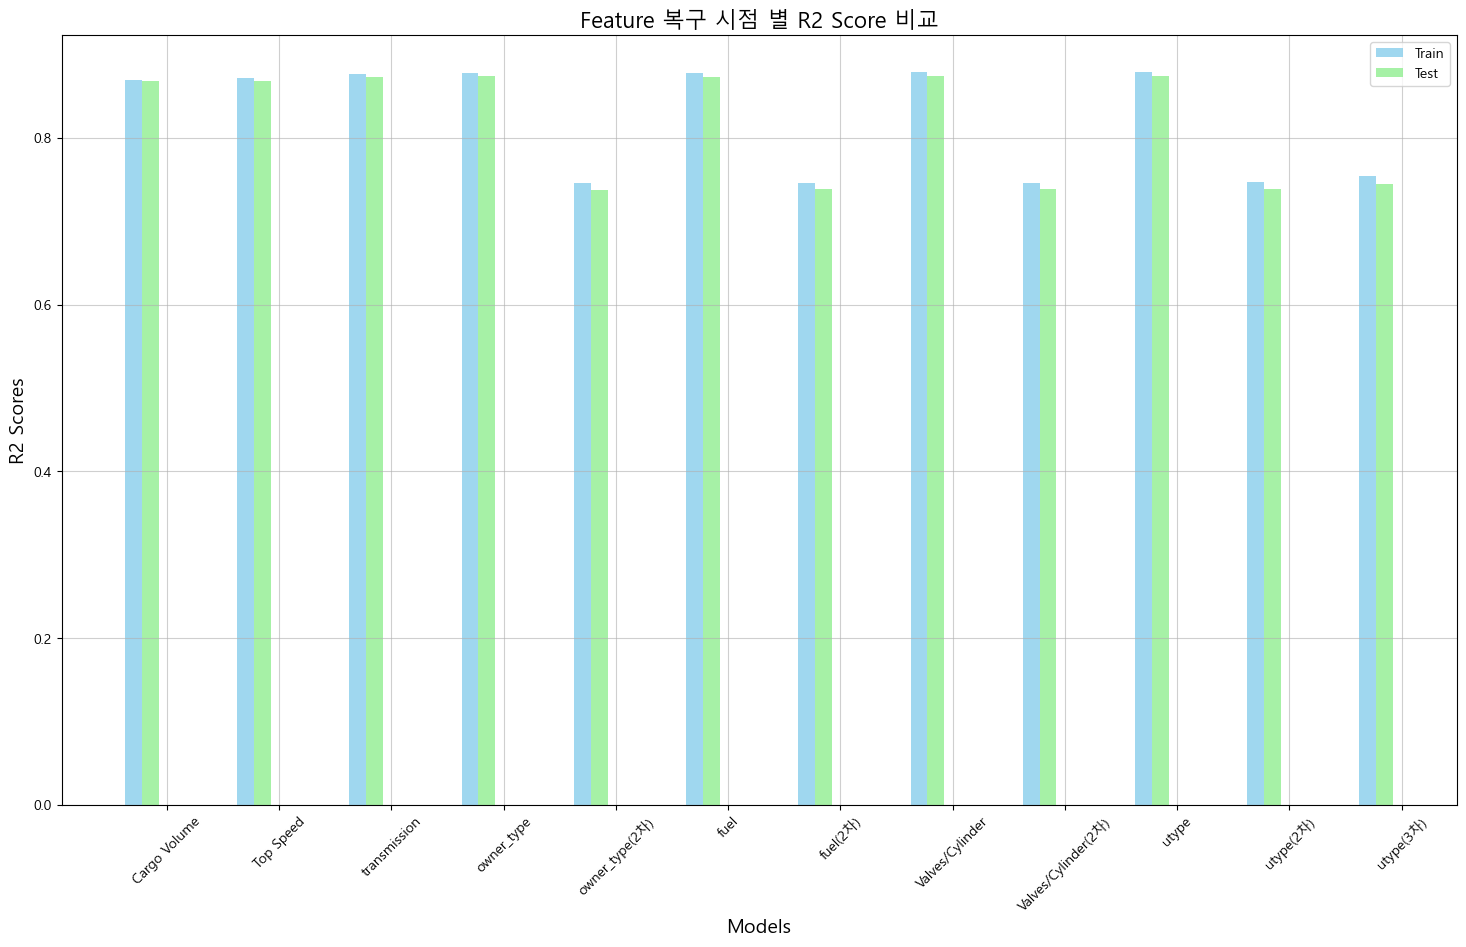

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# 위 과정 별 레이블
labels = ["Cargo Volume", "Top Speed", "transmission", "owner_type", "owner_type(2차)",
          "fuel", "fuel(2차)", "Valves/Cylinder", "Valves/Cylinder(2차)",
          "utype", "utype(2차)", "utype(3차)"]

# 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 설정
n_groups = len(labels)
index = np.arange(n_groups)
bar_width = 0.15

fig, ax = plt.subplots(figsize=(18, 10))
bar1 = ax.bar(index, train_r2, bar_width, label='Train', alpha=0.8, color='skyblue')
bar2 = ax.bar(index + bar_width, test_r2, bar_width, label='Test', alpha=0.8, color='lightgreen')

# 레이블, 타이틀, 범례 설정
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('R2 Scores', fontsize=14)
ax.set_title('Feature 복구 시점 별 R2 Score 비교', fontsize=16)
ax.set_xticks(index + 2*bar_width)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# 그리드 추가
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

### 최종 학습 결과
- feature 복구 후 feature(차원) 수가 7개 이상이 되었을 때부터 차원 축소를 실행한 결과  
  마지막 utype까지 추가 한 뒤 3차원으로 차원 축소 했을 때,  
  train과 test 데이터 사이의 R2 Score 차이는 미미했으며, 오차는 거의 차이가 나지 않았다.

- 다만 이 때 test 데이터의 R2 Score는 약 0.74로,  
  feature 복구 이전의 R2 Score였던 0.85에 비해 상당히 낮아진 것이 확인되었다.